from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Multivariate/pHA')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-15 05:32:57.372786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 05:32:57.879538: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 05:32:57.904575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-15 05:32:57.904604: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Data Format

In [2]:
data = pd.read_csv("data/LocationA.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempA,pHA,ECA,DOA,BODA,TNA
0,21.50,7.73,1748,2.55,27.96,1.28
1,21.21,7.82,1765,2.60,27.90,1.08
2,21.21,7.73,1769,2.59,27.88,1.17
3,21.26,7.82,1776,2.63,27.66,1.15
4,21.09,7.76,1822,2.60,27.71,1.22


In [3]:
target_column = "pHA"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [4]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [5]:
X[0], y[0]

(array([2.150e+01, 1.748e+03, 2.550e+00, 2.796e+01, 1.280e+00, 2.121e+01,
        1.765e+03, 2.600e+00, 2.790e+01, 1.080e+00, 2.121e+01, 1.769e+03,
        2.590e+00, 2.788e+01, 1.170e+00]),
 7.82)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [7]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [9]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [10]:
epochs = 50

# General Model

### CNN

In [11]:
x_train = xt.copy()

2024-03-15 05:33:09.235007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:33:09.235060: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:33:09.235087: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:33:09.235449: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 24.5112 - root_mean_squared_error: 4.9509 

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 8s 802ms/step - loss: 24.5112 - root_mean_squared_error: 4.9509 - val_loss: 20.0848 - val_root_mean_squared_error: 4.4816
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 15.1832 - root_mean_squared_error: 3.8966

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 388ms/step - loss: 15.2546 - root_mean_squared_error: 3.9057 - val_loss: 10.7448 - val_root_mean_squared_error: 3.2779
Epoch 3/50
8/8 [==============================] - 0s 24ms/step - loss: 12.2801 - root_mean_squared_error: 3.5043 - val_loss: 13.6896 - val_root_mean_squared_error: 3.6999
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 12.6782 - root_mean_squared_error: 3.5606

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 11.7877 - root_mean_squared_error: 3.4333 - val_loss: 10.3869 - val_root_mean_squared_error: 3.2229
Epoch 5/50
8/8 [==============================] - 0s 32ms/step - loss: 11.6698 - root_mean_squared_error: 3.4161 - val_loss: 10.8217 - val_root_mean_squared_error: 3.2896
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 10.8209 - root_mean_squared_error: 3.2895

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 516ms/step - loss: 10.1819 - root_mean_squared_error: 3.1909 - val_loss: 10.1164 - val_root_mean_squared_error: 3.1806
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 10.0905 - root_mean_squared_error: 3.1766

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 445ms/step - loss: 10.0690 - root_mean_squared_error: 3.1732 - val_loss: 9.5856 - val_root_mean_squared_error: 3.0961
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 6.7472 - root_mean_squared_error: 2.5975

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 580ms/step - loss: 8.0901 - root_mean_squared_error: 2.8443 - val_loss: 8.8334 - val_root_mean_squared_error: 2.9721
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 7.9816 - root_mean_squared_error: 2.8252

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 579ms/step - loss: 7.9378 - root_mean_squared_error: 2.8174 - val_loss: 8.4777 - val_root_mean_squared_error: 2.9116
Epoch 10/50
8/8 [==============================] - 0s 21ms/step - loss: 7.9521 - root_mean_squared_error: 2.8199 - val_loss: 9.0171 - val_root_mean_squared_error: 3.0028
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 8.0441 - root_mean_squared_error: 2.8362

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 577ms/step - loss: 7.6121 - root_mean_squared_error: 2.7590 - val_loss: 8.0076 - val_root_mean_squared_error: 2.8298
Epoch 12/50
8/8 [==============================] - 0s 39ms/step - loss: 7.1781 - root_mean_squared_error: 2.6792 - val_loss: 8.0400 - val_root_mean_squared_error: 2.8355
Epoch 13/50
8/8 [==============================] - 0s 51ms/step - loss: 7.0981 - root_mean_squared_error: 2.6642 - val_loss: 8.5674 - val_root_mean_squared_error: 2.9270
Epoch 14/50
8/8 [==============================] - 0s 30ms/step - loss: 7.8514 - root_mean_squared_error: 2.8020 - val_loss: 8.7741 - val_root_mean_squared_error: 2.9621
Epoch 15/50
8/8 [==============================] - 0s 35ms/step - loss: 8.1104 - root_mean_squared_error: 2.8479 - val_loss: 9.6350 - val_root_mean_squared_error: 3.1040
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 8.0825 - root_mean_squared_error: 2.8430

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 695ms/step - loss: 8.0825 - root_mean_squared_error: 2.8430 - val_loss: 7.1448 - val_root_mean_squared_error: 2.6730
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 6.7282 - root_mean_squared_error: 2.5939

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 615ms/step - loss: 6.7282 - root_mean_squared_error: 2.5939 - val_loss: 6.7994 - val_root_mean_squared_error: 2.6076
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 4.6896 - root_mean_squared_error: 2.1656

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 517ms/step - loss: 6.2803 - root_mean_squared_error: 2.5060 - val_loss: 6.6405 - val_root_mean_squared_error: 2.5769
Epoch 19/50
8/8 [==============================] - 0s 34ms/step - loss: 5.9196 - root_mean_squared_error: 2.4330 - val_loss: 7.7896 - val_root_mean_squared_error: 2.7910
Epoch 20/50
8/8 [==============================] - 0s 22ms/step - loss: 6.6200 - root_mean_squared_error: 2.5729 - val_loss: 7.5783 - val_root_mean_squared_error: 2.7529
Epoch 21/50
8/8 [==============================] - 0s 30ms/step - loss: 6.3412 - root_mean_squared_error: 2.5182 - val_loss: 6.8468 - val_root_mean_squared_error: 2.6166
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 6.3002 - root_mean_squared_error: 2.5100

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 6.3002 - root_mean_squared_error: 2.5100 - val_loss: 5.9707 - val_root_mean_squared_error: 2.4435
Epoch 23/50
8/8 [==============================] - 0s 45ms/step - loss: 5.4366 - root_mean_squared_error: 2.3317 - val_loss: 6.4864 - val_root_mean_squared_error: 2.5468
Epoch 24/50
8/8 [==============================] - 0s 26ms/step - loss: 6.2831 - root_mean_squared_error: 2.5066 - val_loss: 8.7999 - val_root_mean_squared_error: 2.9665
Epoch 25/50
8/8 [==============================] - 0s 22ms/step - loss: 6.2982 - root_mean_squared_error: 2.5096 - val_loss: 9.8166 - val_root_mean_squared_error: 3.1331
Epoch 26/50
8/8 [==============================] - 0s 29ms/step - loss: 9.7986 - root_mean_squared_error: 3.1303 - val_loss: 9.7144 - val_root_mean_squared_error: 3.1168
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 8.4377 - root_mean_squared_error: 2.9048

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 565ms/step - loss: 8.4377 - root_mean_squared_error: 2.9048 - val_loss: 5.2981 - val_root_mean_squared_error: 2.3018
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 4.2826 - root_mean_squared_error: 2.0694

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 472ms/step - loss: 5.3111 - root_mean_squared_error: 2.3046 - val_loss: 5.1693 - val_root_mean_squared_error: 2.2736
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 5.6674 - root_mean_squared_error: 2.3806

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 418ms/step - loss: 4.5771 - root_mean_squared_error: 2.1394 - val_loss: 5.1681 - val_root_mean_squared_error: 2.2733
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 4.5040 - root_mean_squared_error: 2.1223

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 460ms/step - loss: 4.6470 - root_mean_squared_error: 2.1557 - val_loss: 4.9257 - val_root_mean_squared_error: 2.2194
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 3.9304 - root_mean_squared_error: 1.9825

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 476ms/step - loss: 4.5074 - root_mean_squared_error: 2.1231 - val_loss: 4.8388 - val_root_mean_squared_error: 2.1997
Epoch 32/50
8/8 [==============================] - 0s 23ms/step - loss: 4.4467 - root_mean_squared_error: 2.1087 - val_loss: 5.8245 - val_root_mean_squared_error: 2.4134
Epoch 33/50
8/8 [==============================] - 0s 28ms/step - loss: 4.9049 - root_mean_squared_error: 2.2147 - val_loss: 4.8974 - val_root_mean_squared_error: 2.2130
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 4.0003 - root_mean_squared_error: 2.0001

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 527ms/step - loss: 4.0003 - root_mean_squared_error: 2.0001 - val_loss: 4.8034 - val_root_mean_squared_error: 2.1917
Epoch 35/50
8/8 [==============================] - 0s 51ms/step - loss: 3.9662 - root_mean_squared_error: 1.9915 - val_loss: 5.6714 - val_root_mean_squared_error: 2.3815
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 4.0906 - root_mean_squared_error: 2.0225

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 503ms/step - loss: 4.3167 - root_mean_squared_error: 2.0777 - val_loss: 4.1912 - val_root_mean_squared_error: 2.0472
Epoch 37/50
8/8 [==============================] - 0s 46ms/step - loss: 3.5912 - root_mean_squared_error: 1.8951 - val_loss: 4.7849 - val_root_mean_squared_error: 2.1874
Epoch 38/50
8/8 [==============================] - 0s 28ms/step - loss: 3.8219 - root_mean_squared_error: 1.9550 - val_loss: 6.1525 - val_root_mean_squared_error: 2.4804
Epoch 39/50
8/8 [==============================] - 0s 46ms/step - loss: 5.3535 - root_mean_squared_error: 2.3138 - val_loss: 6.6019 - val_root_mean_squared_error: 2.5694
Epoch 40/50
8/8 [==============================] - 0s 31ms/step - loss: 4.1457 - root_mean_squared_error: 2.0361 - val_loss: 4.5568 - val_root_mean_squared_error: 2.1347
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 3.5712 - root_mean_squared_error: 1.8898

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 3.6650 - root_mean_squared_error: 1.9144 - val_loss: 3.9801 - val_root_mean_squared_error: 1.9950
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 3.6479 - root_mean_squared_error: 1.9099

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 664ms/step - loss: 3.6479 - root_mean_squared_error: 1.9099 - val_loss: 3.5866 - val_root_mean_squared_error: 1.8938
Epoch 43/50
8/8 [==============================] - 0s 38ms/step - loss: 3.4096 - root_mean_squared_error: 1.8465 - val_loss: 4.4595 - val_root_mean_squared_error: 2.1118
Epoch 44/50
8/8 [==============================] - 0s 37ms/step - loss: 3.5493 - root_mean_squared_error: 1.8840 - val_loss: 3.5898 - val_root_mean_squared_error: 1.8947
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 3.1121 - root_mean_squared_error: 1.7641

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 444ms/step - loss: 3.1121 - root_mean_squared_error: 1.7641 - val_loss: 3.5338 - val_root_mean_squared_error: 1.8798
Epoch 46/50
8/8 [==============================] - 0s 63ms/step - loss: 3.3279 - root_mean_squared_error: 1.8243 - val_loss: 7.0328 - val_root_mean_squared_error: 2.6519
Epoch 47/50
8/8 [==============================] - 0s 39ms/step - loss: 4.3862 - root_mean_squared_error: 2.0943 - val_loss: 4.6280 - val_root_mean_squared_error: 2.1513
Epoch 48/50
8/8 [==============================] - 0s 38ms/step - loss: 3.4225 - root_mean_squared_error: 1.8500 - val_loss: 4.9083 - val_root_mean_squared_error: 2.2155
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 4.3593 - root_mean_squared_error: 2.0879

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 567ms/step - loss: 3.4723 - root_mean_squared_error: 1.8634 - val_loss: 3.0665 - val_root_mean_squared_error: 1.7511
Epoch 50/50
8/8 [==============================] - 1s 8ms/step


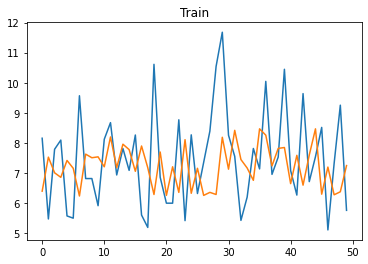

2/2 [==============================] - 0s 4ms/step


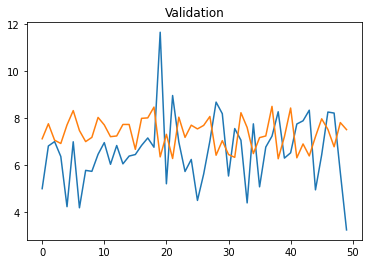

3/3 [==============================] - 0s 3ms/step


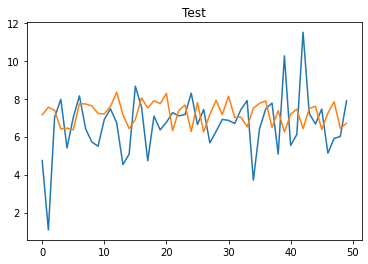

3/3 [==============================] - 0s 3ms/step


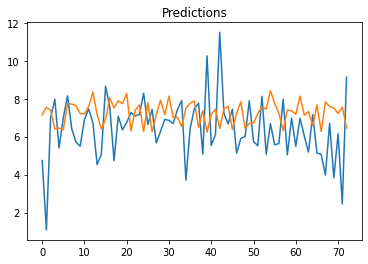

In [12]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 60.0628 - root_mean_squared_error: 7.7500

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 31s 3s/step - loss: 59.9912 - root_mean_squared_error: 7.7454 - val_loss: 57.2942 - val_root_mean_squared_error: 7.5693
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 56.8994 - root_mean_squared_error: 7.5432

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 56.8994 - root_mean_squared_error: 7.5432 - val_loss: 54.2868 - val_root_mean_squared_error: 7.3680
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 54.1356 - root_mean_squared_error: 7.3577

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 53.9033 - root_mean_squared_error: 7.3419 - val_loss: 51.3941 - val_root_mean_squared_error: 7.1690
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 51.0189 - root_mean_squared_error: 7.1428

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 51.0264 - root_mean_squared_error: 7.1433 - val_loss: 48.6016 - val_root_mean_squared_error: 6.9715
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 48.2328 - root_mean_squared_error: 6.9450

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 48.2328 - root_mean_squared_error: 6.9450 - val_loss: 45.8448 - val_root_mean_squared_error: 6.7709
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 45.4235 - root_mean_squared_error: 6.7397

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 45.4392 - root_mean_squared_error: 6.7409 - val_loss: 43.0960 - val_root_mean_squared_error: 6.5648
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 42.9014 - root_mean_squared_error: 6.5499

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 42.7372 - root_mean_squared_error: 6.5374 - val_loss: 40.4969 - val_root_mean_squared_error: 6.3637
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 40.1453 - root_mean_squared_error: 6.3360

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 40.1453 - root_mean_squared_error: 6.3360 - val_loss: 37.9875 - val_root_mean_squared_error: 6.1634
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 37.7117 - root_mean_squared_error: 6.1410

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 37.6322 - root_mean_squared_error: 6.1345 - val_loss: 35.5445 - val_root_mean_squared_error: 5.9619
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 35.7881 - root_mean_squared_error: 5.9823

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 35.1951 - root_mean_squared_error: 5.9325 - val_loss: 33.1618 - val_root_mean_squared_error: 5.7586
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 32.7431 - root_mean_squared_error: 5.7222

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 32.8053 - root_mean_squared_error: 5.7276 - val_loss: 30.8417 - val_root_mean_squared_error: 5.5535
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 30.4325 - root_mean_squared_error: 5.5166

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 30.4908 - root_mean_squared_error: 5.5219 - val_loss: 28.5807 - val_root_mean_squared_error: 5.3461
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 28.2303 - root_mean_squared_error: 5.3132

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 28.2303 - root_mean_squared_error: 5.3132 - val_loss: 26.3917 - val_root_mean_squared_error: 5.1373
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 26.0449 - root_mean_squared_error: 5.1034

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 26.0449 - root_mean_squared_error: 5.1034 - val_loss: 24.2819 - val_root_mean_squared_error: 4.9277
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 24.0199 - root_mean_squared_error: 4.9010

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 23.9420 - root_mean_squared_error: 4.8931 - val_loss: 22.2532 - val_root_mean_squared_error: 4.7173
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 21.9220 - root_mean_squared_error: 4.6821

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 21.9220 - root_mean_squared_error: 4.6821 - val_loss: 20.3043 - val_root_mean_squared_error: 4.5060
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 19.9278 - root_mean_squared_error: 4.4641

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 19.9837 - root_mean_squared_error: 4.4703 - val_loss: 18.4378 - val_root_mean_squared_error: 4.2939
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 18.0769 - root_mean_squared_error: 4.2517

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 18.1290 - root_mean_squared_error: 4.2578 - val_loss: 16.6625 - val_root_mean_squared_error: 4.0820
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 16.3688 - root_mean_squared_error: 4.0458

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 16.3688 - root_mean_squared_error: 4.0458 - val_loss: 14.9857 - val_root_mean_squared_error: 3.8711
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 14.7149 - root_mean_squared_error: 3.8360

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 14.7149 - root_mean_squared_error: 3.8360 - val_loss: 13.4169 - val_root_mean_squared_error: 3.6629
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 13.1107 - root_mean_squared_error: 3.6209

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 13.1611 - root_mean_squared_error: 3.6278 - val_loss: 11.9430 - val_root_mean_squared_error: 3.4559
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 11.7584 - root_mean_squared_error: 3.4290

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 11.7001 - root_mean_squared_error: 3.4205 - val_loss: 10.5226 - val_root_mean_squared_error: 3.2439
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 10.2470 - root_mean_squared_error: 3.2011

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 10.2802 - root_mean_squared_error: 3.2063 - val_loss: 9.2066 - val_root_mean_squared_error: 3.0342
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 9.0155 - root_mean_squared_error: 3.0026

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 9.0155 - root_mean_squared_error: 3.0026 - val_loss: 8.0492 - val_root_mean_squared_error: 2.8371
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 8.1743 - root_mean_squared_error: 2.8591

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 7.8872 - root_mean_squared_error: 2.8084 - val_loss: 7.0083 - val_root_mean_squared_error: 2.6473
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 6.8741 - root_mean_squared_error: 2.6218

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 6.8742 - root_mean_squared_error: 2.6219 - val_loss: 6.0731 - val_root_mean_squared_error: 2.4644
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 5.9626 - root_mean_squared_error: 2.4418

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 5.9626 - root_mean_squared_error: 2.4418 - val_loss: 5.2457 - val_root_mean_squared_error: 2.2903
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 5.1596 - root_mean_squared_error: 2.2715

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 5.1596 - root_mean_squared_error: 2.2715 - val_loss: 4.5230 - val_root_mean_squared_error: 2.1267
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 4.4640 - root_mean_squared_error: 2.1128

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 4.4640 - root_mean_squared_error: 2.1128 - val_loss: 3.8849 - val_root_mean_squared_error: 1.9710
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 3.8683 - root_mean_squared_error: 1.9668

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 3.8402 - root_mean_squared_error: 1.9596 - val_loss: 3.3321 - val_root_mean_squared_error: 1.8254
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 3.3017 - root_mean_squared_error: 1.8171

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 3.3017 - root_mean_squared_error: 1.8171 - val_loss: 2.8515 - val_root_mean_squared_error: 1.6886
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2.8338 - root_mean_squared_error: 1.6834

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2.8338 - root_mean_squared_error: 1.6834 - val_loss: 2.4371 - val_root_mean_squared_error: 1.5611
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4433 - root_mean_squared_error: 1.5631

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2.4337 - root_mean_squared_error: 1.5600 - val_loss: 2.0825 - val_root_mean_squared_error: 1.4431
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2.0897 - root_mean_squared_error: 1.4456

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2.0893 - root_mean_squared_error: 1.4454 - val_loss: 1.7822 - val_root_mean_squared_error: 1.3350
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7975 - root_mean_squared_error: 1.3407

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.7978 - root_mean_squared_error: 1.3408 - val_loss: 1.5262 - val_root_mean_squared_error: 1.2354
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.5464 - root_mean_squared_error: 1.2436

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.5464 - root_mean_squared_error: 1.2436 - val_loss: 1.3108 - val_root_mean_squared_error: 1.1449
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3280 - root_mean_squared_error: 1.1524

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.3364 - root_mean_squared_error: 1.1560 - val_loss: 1.1272 - val_root_mean_squared_error: 1.0617
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1546 - root_mean_squared_error: 1.0745

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 1.1568 - root_mean_squared_error: 1.0755 - val_loss: 0.9734 - val_root_mean_squared_error: 0.9866
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9849 - root_mean_squared_error: 0.9924

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.0039 - root_mean_squared_error: 1.0020 - val_loss: 0.8467 - val_root_mean_squared_error: 0.9202
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8770 - root_mean_squared_error: 0.9365

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.8781 - root_mean_squared_error: 0.9371 - val_loss: 0.7401 - val_root_mean_squared_error: 0.8603
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7736 - root_mean_squared_error: 0.8795

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.7743 - root_mean_squared_error: 0.8800 - val_loss: 0.6525 - val_root_mean_squared_error: 0.8078
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 0.7038 - root_mean_squared_error: 0.8390

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.6862 - root_mean_squared_error: 0.8284 - val_loss: 0.5808 - val_root_mean_squared_error: 0.7621
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5991 - root_mean_squared_error: 0.7740

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.6139 - root_mean_squared_error: 0.7835 - val_loss: 0.5219 - val_root_mean_squared_error: 0.7224
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 0.6059 - root_mean_squared_error: 0.7784

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.5556 - root_mean_squared_error: 0.7454 - val_loss: 0.4724 - val_root_mean_squared_error: 0.6873
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5050 - root_mean_squared_error: 0.7107

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.5053 - root_mean_squared_error: 0.7108 - val_loss: 0.4346 - val_root_mean_squared_error: 0.6592
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4705 - root_mean_squared_error: 0.6859

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.4639 - root_mean_squared_error: 0.6811 - val_loss: 0.4035 - val_root_mean_squared_error: 0.6352
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.4323 - root_mean_squared_error: 0.6575

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.4323 - root_mean_squared_error: 0.6575 - val_loss: 0.3773 - val_root_mean_squared_error: 0.6142
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.4044 - root_mean_squared_error: 0.6359

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.4044 - root_mean_squared_error: 0.6359 - val_loss: 0.3563 - val_root_mean_squared_error: 0.5969
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.3822 - root_mean_squared_error: 0.6182

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.3822 - root_mean_squared_error: 0.6182 - val_loss: 0.3394 - val_root_mean_squared_error: 0.5825
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.3634 - root_mean_squared_error: 0.6028

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 8ms/step


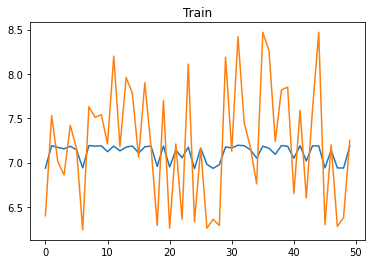

2/2 [==============================] - 2s 7ms/step


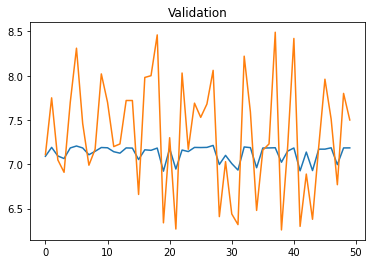

3/3 [==============================] - 0s 21ms/step


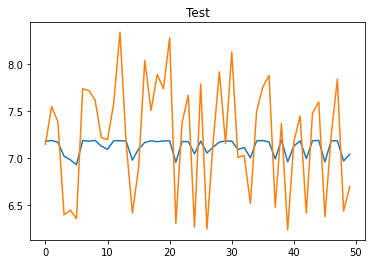

3/3 [==============================] - 0s 5ms/step


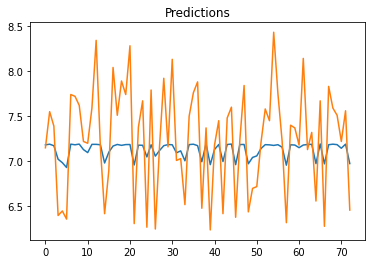

In [13]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 53.8221 - root_mean_squared_error: 7.3364

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 49s 5s/step - loss: 53.8221 - root_mean_squared_error: 7.3364 - val_loss: 52.1878 - val_root_mean_squared_error: 7.2241
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 52.6094 - root_mean_squared_error: 7.2532

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 52.5907 - root_mean_squared_error: 7.2519 - val_loss: 50.9591 - val_root_mean_squared_error: 7.1386
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 51.3200 - root_mean_squared_error: 7.1638

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 51.3444 - root_mean_squared_error: 7.1655 - val_loss: 49.7338 - val_root_mean_squared_error: 7.0522
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 50.1554 - root_mean_squared_error: 7.0820

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 50.1089 - root_mean_squared_error: 7.0788 - val_loss: 48.5374 - val_root_mean_squared_error: 6.9669
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 48.9057 - root_mean_squared_error: 6.9933

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 48.9057 - root_mean_squared_error: 6.9933 - val_loss: 47.3656 - val_root_mean_squared_error: 6.8823
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 47.6073 - root_mean_squared_error: 6.8998

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 47.7160 - root_mean_squared_error: 6.9077 - val_loss: 46.1849 - val_root_mean_squared_error: 6.7959
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 46.5678 - root_mean_squared_error: 6.8241

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 46.5121 - root_mean_squared_error: 6.8200 - val_loss: 44.9785 - val_root_mean_squared_error: 6.7066
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 45.2880 - root_mean_squared_error: 6.7296

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 45.2880 - root_mean_squared_error: 6.7296 - val_loss: 43.7737 - val_root_mean_squared_error: 6.6162
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 44.0688 - root_mean_squared_error: 6.6384

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 44.0687 - root_mean_squared_error: 6.6384 - val_loss: 42.5745 - val_root_mean_squared_error: 6.5249
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 42.9001 - root_mean_squared_error: 6.5498

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 42.8431 - root_mean_squared_error: 6.5455 - val_loss: 41.3543 - val_root_mean_squared_error: 6.4307
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 41.6014 - root_mean_squared_error: 6.4499

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 41.5974 - root_mean_squared_error: 6.4496 - val_loss: 40.1111 - val_root_mean_squared_error: 6.3333
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 40.3287 - root_mean_squared_error: 6.3505

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 40.3287 - root_mean_squared_error: 6.3505 - val_loss: 38.8005 - val_root_mean_squared_error: 6.2290
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 38.8456 - root_mean_squared_error: 6.2326

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 38.8516 - root_mean_squared_error: 6.2331 - val_loss: 37.2047 - val_root_mean_squared_error: 6.0996
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 37.8373 - root_mean_squared_error: 6.1512

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 37.2873 - root_mean_squared_error: 6.1063 - val_loss: 35.6707 - val_root_mean_squared_error: 5.9725
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 36.4835 - root_mean_squared_error: 6.0402

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 35.7294 - root_mean_squared_error: 5.9774 - val_loss: 34.0771 - val_root_mean_squared_error: 5.8376
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 34.5076 - root_mean_squared_error: 5.8743

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 34.1215 - root_mean_squared_error: 5.8414 - val_loss: 32.5489 - val_root_mean_squared_error: 5.7052
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 32.5975 - root_mean_squared_error: 5.7094

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 32.5975 - root_mean_squared_error: 5.7094 - val_loss: 31.0782 - val_root_mean_squared_error: 5.5748
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 31.5812 - root_mean_squared_error: 5.6197

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 31.1168 - root_mean_squared_error: 5.5782 - val_loss: 29.6243 - val_root_mean_squared_error: 5.4428
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 29.9098 - root_mean_squared_error: 5.4690

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 29.6432 - root_mean_squared_error: 5.4446 - val_loss: 28.1819 - val_root_mean_squared_error: 5.3087
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 28.1497 - root_mean_squared_error: 5.3056

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 28.1803 - root_mean_squared_error: 5.3085 - val_loss: 26.7566 - val_root_mean_squared_error: 5.1727
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 26.8483 - root_mean_squared_error: 5.1815

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 26.7326 - root_mean_squared_error: 5.1704 - val_loss: 25.3368 - val_root_mean_squared_error: 5.0336
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 25.2823 - root_mean_squared_error: 5.0282

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 25.2823 - root_mean_squared_error: 5.0282 - val_loss: 23.8498 - val_root_mean_squared_error: 4.8836
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 23.5968 - root_mean_squared_error: 4.8577

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 23.6560 - root_mean_squared_error: 4.8637 - val_loss: 22.1053 - val_root_mean_squared_error: 4.7016
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 22.0831 - root_mean_squared_error: 4.6993

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 22.0041 - root_mean_squared_error: 4.6909 - val_loss: 20.6879 - val_root_mean_squared_error: 4.5484
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 20.5504 - root_mean_squared_error: 4.5333

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 20.6027 - root_mean_squared_error: 4.5390 - val_loss: 19.3487 - val_root_mean_squared_error: 4.3987
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 19.2468 - root_mean_squared_error: 4.3871

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 19.2487 - root_mean_squared_error: 4.3873 - val_loss: 18.0081 - val_root_mean_squared_error: 4.2436
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 17.8468 - root_mean_squared_error: 4.2245

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 17.8468 - root_mean_squared_error: 4.2245 - val_loss: 16.6070 - val_root_mean_squared_error: 4.0752
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 16.4310 - root_mean_squared_error: 4.0535

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 16.4310 - root_mean_squared_error: 4.0535 - val_loss: 15.2143 - val_root_mean_squared_error: 3.9006
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 15.0587 - root_mean_squared_error: 3.8806

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 15.0587 - root_mean_squared_error: 3.8806 - val_loss: 13.9458 - val_root_mean_squared_error: 3.7344
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 13.7782 - root_mean_squared_error: 3.7119

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 13.7611 - root_mean_squared_error: 3.7096 - val_loss: 12.5789 - val_root_mean_squared_error: 3.5467
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 12.3231 - root_mean_squared_error: 3.5104

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 12.3231 - root_mean_squared_error: 3.5104 - val_loss: 11.1958 - val_root_mean_squared_error: 3.3460
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 11.1596 - root_mean_squared_error: 3.3406

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 10.9746 - root_mean_squared_error: 3.3128 - val_loss: 9.9865 - val_root_mean_squared_error: 3.1601
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 10.0010 - root_mean_squared_error: 3.1624

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 9.8520 - root_mean_squared_error: 3.1388 - val_loss: 8.9831 - val_root_mean_squared_error: 2.9972
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 9.0598 - root_mean_squared_error: 3.0100

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 8.8642 - root_mean_squared_error: 2.9773 - val_loss: 8.0483 - val_root_mean_squared_error: 2.8369
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 7.9366 - root_mean_squared_error: 2.8172

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 7.9366 - root_mean_squared_error: 2.8172 - val_loss: 7.1813 - val_root_mean_squared_error: 2.6798
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 7.0757 - root_mean_squared_error: 2.6600

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 7.0757 - root_mean_squared_error: 2.6600 - val_loss: 6.3758 - val_root_mean_squared_error: 2.5250
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 6.2472 - root_mean_squared_error: 2.4994

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 6.2835 - root_mean_squared_error: 2.5067 - val_loss: 5.6319 - val_root_mean_squared_error: 2.3732
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 5.5305 - root_mean_squared_error: 2.3517

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 5.5396 - root_mean_squared_error: 2.3536 - val_loss: 4.9097 - val_root_mean_squared_error: 2.2158
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 4.8508 - root_mean_squared_error: 2.2025

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 4.8189 - root_mean_squared_error: 2.1952 - val_loss: 4.2531 - val_root_mean_squared_error: 2.0623
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 4.1535 - root_mean_squared_error: 2.0380

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 4.1535 - root_mean_squared_error: 2.0380 - val_loss: 3.5521 - val_root_mean_squared_error: 1.8847
Epoch 41/50
4/8 [==============>...............] - ETA: 0s - loss: 3.6024 - root_mean_squared_error: 1.8980

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 3.4649 - root_mean_squared_error: 1.8614 - val_loss: 3.0114 - val_root_mean_squared_error: 1.7353
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2.9519 - root_mean_squared_error: 1.7181

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2.9711 - root_mean_squared_error: 1.7237 - val_loss: 2.5791 - val_root_mean_squared_error: 1.6060
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5647 - root_mean_squared_error: 1.6015

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2.5554 - root_mean_squared_error: 1.5986 - val_loss: 2.2122 - val_root_mean_squared_error: 1.4873
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2.2324 - root_mean_squared_error: 1.4941

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2.1969 - root_mean_squared_error: 1.4822 - val_loss: 1.8917 - val_root_mean_squared_error: 1.3754
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 1.8828 - root_mean_squared_error: 1.3721

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 1.8828 - root_mean_squared_error: 1.3721 - val_loss: 1.6066 - val_root_mean_squared_error: 1.2675
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 1.5867 - root_mean_squared_error: 1.2596

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 1.5867 - root_mean_squared_error: 1.2596 - val_loss: 1.3446 - val_root_mean_squared_error: 1.1596
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3636 - root_mean_squared_error: 1.1677

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 1.3448 - root_mean_squared_error: 1.1596 - val_loss: 1.1423 - val_root_mean_squared_error: 1.0688
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1392 - root_mean_squared_error: 1.0674

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1.1468 - root_mean_squared_error: 1.0709 - val_loss: 0.9752 - val_root_mean_squared_error: 0.9875
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 1.0094 - root_mean_squared_error: 1.0047

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 0.9828 - root_mean_squared_error: 0.9914 - val_loss: 0.8328 - val_root_mean_squared_error: 0.9126
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.8409 - root_mean_squared_error: 0.9170

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 2s 9ms/step


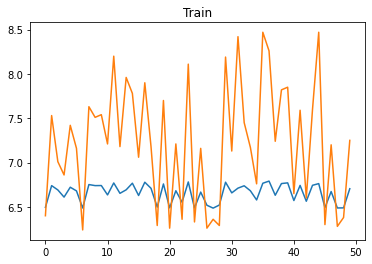

2/2 [==============================] - 3s 12ms/step


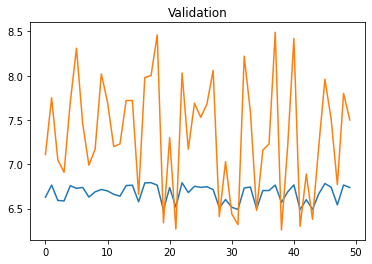

3/3 [==============================] - 0s 21ms/step


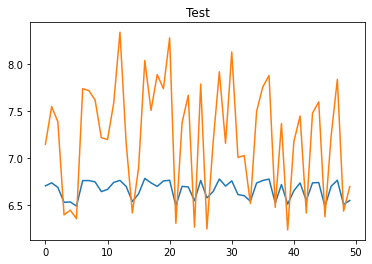

3/3 [==============================] - 0s 7ms/step


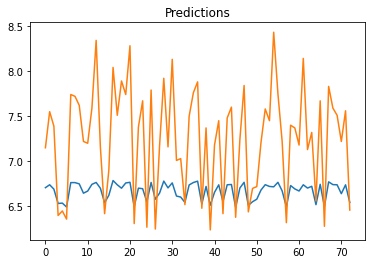

In [14]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
3/8 [==========>...................] - ETA: 0s - loss: 43.4518 - root_mean_squared_error: 6.5918 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 17s 1s/step - loss: 42.5414 - root_mean_squared_error: 6.5224 - val_loss: 39.7910 - val_root_mean_squared_error: 6.3080
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 39.0936 - root_mean_squared_error: 6.2525INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 38.4277 - root_mean_squared_error: 6.1990 - val_loss: 35.8506 - val_root_mean_squared_error: 5.9875
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 35.2107 - root_mean_squared_error: 5.9339INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 34.5806 - root_mean_squared_error: 5.8805 - val_loss: 32.1861 - val_root_mean_squared_error: 5.6733
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 31.2009 - root_mean_squared_error: 5.5858INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 31.0072 - root_mean_squared_error: 5.5684 - val_loss: 28.7978 - val_root_mean_squared_error: 5.3664
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 27.7040 - root_mean_squared_error: 5.2635INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 973ms/step - loss: 27.7040 - root_mean_squared_error: 5.2635 - val_loss: 25.6647 - val_root_mean_squared_error: 5.0660
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 24.6872 - root_mean_squared_error: 4.9686INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 24.6348 - root_mean_squared_error: 4.9633 - val_loss: 22.7191 - val_root_mean_squared_error: 4.7665
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 23.2160 - root_mean_squared_error: 4.8183INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 21.7737 - root_mean_squared_error: 4.6662 - val_loss: 20.0797 - val_root_mean_squared_error: 4.4810
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 19.4358 - root_mean_squared_error: 4.4086INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 19.2628 - root_mean_squared_error: 4.3889 - val_loss: 17.7559 - val_root_mean_squared_error: 4.2138
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 17.0209 - root_mean_squared_error: 4.1256INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 17.0211 - root_mean_squared_error: 4.1257 - val_loss: 15.6568 - val_root_mean_squared_error: 3.9569
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 15.0016 - root_mean_squared_error: 3.8732INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 15.0016 - root_mean_squared_error: 3.8732 - val_loss: 13.7638 - val_root_mean_squared_error: 3.7100
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 13.1696 - root_mean_squared_error: 3.6290INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 13.1749 - root_mean_squared_error: 3.6297 - val_loss: 12.0686 - val_root_mean_squared_error: 3.4740
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 11.7563 - root_mean_squared_error: 3.4288INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 11.5497 - root_mean_squared_error: 3.3985 - val_loss: 10.5459 - val_root_mean_squared_error: 3.2474
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 10.0870 - root_mean_squared_error: 3.1760INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 10.0870 - root_mean_squared_error: 3.1760 - val_loss: 9.1890 - val_root_mean_squared_error: 3.0313
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 8.8278 - root_mean_squared_error: 2.9712INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 8.7874 - root_mean_squared_error: 2.9644 - val_loss: 7.9824 - val_root_mean_squared_error: 2.8253
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 7.6325 - root_mean_squared_error: 2.7627INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 7.6325 - root_mean_squared_error: 2.7627 - val_loss: 6.9158 - val_root_mean_squared_error: 2.6298
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 6.6514 - root_mean_squared_error: 2.5790INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 6.6104 - root_mean_squared_error: 2.5711 - val_loss: 5.9729 - val_root_mean_squared_error: 2.4440
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 5.7101 - root_mean_squared_error: 2.3896INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 5.7101 - root_mean_squared_error: 2.3896 - val_loss: 5.1405 - val_root_mean_squared_error: 2.2673
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 4.9454 - root_mean_squared_error: 2.2238INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 4.9172 - root_mean_squared_error: 2.2175 - val_loss: 4.4103 - val_root_mean_squared_error: 2.1001
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 4.3328 - root_mean_squared_error: 2.0815INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 4.2208 - root_mean_squared_error: 2.0545 - val_loss: 3.7739 - val_root_mean_squared_error: 1.9427
Epoch 20/50
4/8 [==============>...............] - ETA: 0s - loss: 3.6249 - root_mean_squared_error: 1.9039INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 3.6125 - root_mean_squared_error: 1.9006 - val_loss: 3.2206 - val_root_mean_squared_error: 1.7946
Epoch 21/50
3/8 [==========>...................] - ETA: 0s - loss: 3.2616 - root_mean_squared_error: 1.8060INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 3.0863 - root_mean_squared_error: 1.7568 - val_loss: 2.7359 - val_root_mean_squared_error: 1.6541
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2.6215 - root_mean_squared_error: 1.6191INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.6215 - root_mean_squared_error: 1.6191 - val_loss: 2.3190 - val_root_mean_squared_error: 1.5228
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2.2449 - root_mean_squared_error: 1.4983INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2.2248 - root_mean_squared_error: 1.4916 - val_loss: 1.9580 - val_root_mean_squared_error: 1.3993
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8788 - root_mean_squared_error: 1.3707INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.8815 - root_mean_squared_error: 1.3717 - val_loss: 1.6500 - val_root_mean_squared_error: 1.2845
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 1.6172 - root_mean_squared_error: 1.2717INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 910ms/step - loss: 1.5898 - root_mean_squared_error: 1.2609 - val_loss: 1.3868 - val_root_mean_squared_error: 1.1776
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3484 - root_mean_squared_error: 1.1612INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.3397 - root_mean_squared_error: 1.1575 - val_loss: 1.1643 - val_root_mean_squared_error: 1.0790
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 1.1299 - root_mean_squared_error: 1.0630INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.1299 - root_mean_squared_error: 1.0630 - val_loss: 0.9762 - val_root_mean_squared_error: 0.9880
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9494 - root_mean_squared_error: 0.9744INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.9498 - root_mean_squared_error: 0.9746 - val_loss: 0.8196 - val_root_mean_squared_error: 0.9053
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8091 - root_mean_squared_error: 0.8995INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.8011 - root_mean_squared_error: 0.8950 - val_loss: 0.6908 - val_root_mean_squared_error: 0.8312
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 0.6805 - root_mean_squared_error: 0.8249INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.6797 - root_mean_squared_error: 0.8245 - val_loss: 0.5857 - val_root_mean_squared_error: 0.7653
Epoch 31/50
4/8 [==============>...............] - ETA: 0s - loss: 0.5619 - root_mean_squared_error: 0.7496INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.5791 - root_mean_squared_error: 0.7610 - val_loss: 0.5000 - val_root_mean_squared_error: 0.7071
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4996 - root_mean_squared_error: 0.7068INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4977 - root_mean_squared_error: 0.7054 - val_loss: 0.4285 - val_root_mean_squared_error: 0.6546
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 0.4312 - root_mean_squared_error: 0.6566INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4312 - root_mean_squared_error: 0.6566 - val_loss: 0.3716 - val_root_mean_squared_error: 0.6096
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3828 - root_mean_squared_error: 0.6187INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.3757 - root_mean_squared_error: 0.6129 - val_loss: 0.3270 - val_root_mean_squared_error: 0.5718
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 0.3483 - root_mean_squared_error: 0.5901INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.3343 - root_mean_squared_error: 0.5782 - val_loss: 0.2911 - val_root_mean_squared_error: 0.5395
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 0.2821 - root_mean_squared_error: 0.5311INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.2991 - root_mean_squared_error: 0.5469 - val_loss: 0.2626 - val_root_mean_squared_error: 0.5124
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 0.2718 - root_mean_squared_error: 0.5213INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.2712 - root_mean_squared_error: 0.5208 - val_loss: 0.2403 - val_root_mean_squared_error: 0.4902
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 0.2488 - root_mean_squared_error: 0.4988INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 999ms/step - loss: 0.2500 - root_mean_squared_error: 0.5000 - val_loss: 0.2222 - val_root_mean_squared_error: 0.4714
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.2382 - root_mean_squared_error: 0.4880INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.2324 - root_mean_squared_error: 0.4821 - val_loss: 0.2083 - val_root_mean_squared_error: 0.4564
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 0.2383 - root_mean_squared_error: 0.4881INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.2191 - root_mean_squared_error: 0.4681 - val_loss: 0.1979 - val_root_mean_squared_error: 0.4449
Epoch 41/50
2/8 [======>.......................] - ETA: 0s - loss: 0.1823 - root_mean_squared_error: 0.4269INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.2088 - root_mean_squared_error: 0.4569 - val_loss: 0.1900 - val_root_mean_squared_error: 0.4359
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 0.2084 - root_mean_squared_error: 0.4565INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.2007 - root_mean_squared_error: 0.4480 - val_loss: 0.1835 - val_root_mean_squared_error: 0.4284
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.1941 - root_mean_squared_error: 0.4406INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.1941 - root_mean_squared_error: 0.4406 - val_loss: 0.1783 - val_root_mean_squared_error: 0.4223
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1356 - root_mean_squared_error: 0.3682INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.1886 - root_mean_squared_error: 0.4343 - val_loss: 0.1743 - val_root_mean_squared_error: 0.4175
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1579 - root_mean_squared_error: 0.3974INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.1840 - root_mean_squared_error: 0.4290 - val_loss: 0.1710 - val_root_mean_squared_error: 0.4136
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 0.1733 - root_mean_squared_error: 0.4163INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 874ms/step - loss: 0.1805 - root_mean_squared_error: 0.4249 - val_loss: 0.1683 - val_root_mean_squared_error: 0.4102
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.1781 - root_mean_squared_error: 0.4220INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.1774 - root_mean_squared_error: 0.4212 - val_loss: 0.1658 - val_root_mean_squared_error: 0.4072
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 0.1812 - root_mean_squared_error: 0.4257INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.1745 - root_mean_squared_error: 0.4177 - val_loss: 0.1640 - val_root_mean_squared_error: 0.4049
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 0.1738 - root_mean_squared_error: 0.4168INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 978ms/step - loss: 0.1723 - root_mean_squared_error: 0.4151 - val_loss: 0.1624 - val_root_mean_squared_error: 0.4030
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 0.1790 - root_mean_squared_error: 0.4231INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 25ms/step


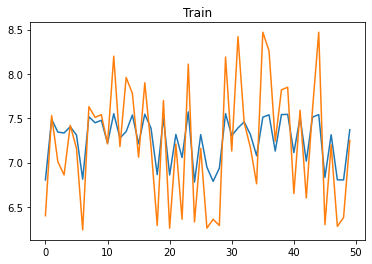

2/2 [==============================] - 1s 10ms/step


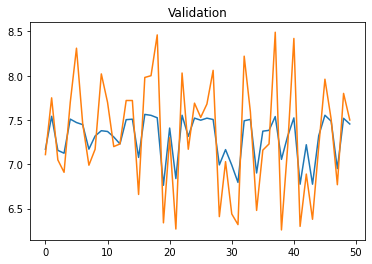

3/3 [==============================] - 0s 11ms/step


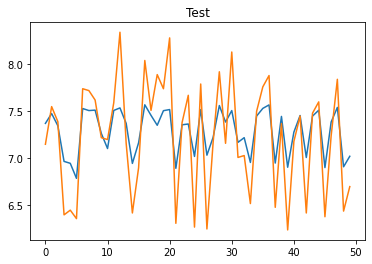

3/3 [==============================] - 0s 5ms/step


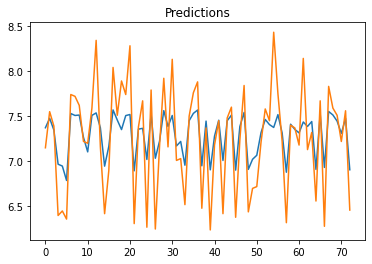

In [15]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [16]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 13638.9473 - root_mean_squared_error: 116.7859

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 13638.9473 - root_mean_squared_error: 116.7859 - val_loss: 3064.2910 - val_root_mean_squared_error: 55.3560
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2730.1182 - root_mean_squared_error: 52.2505

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 445ms/step - loss: 924.1048 - root_mean_squared_error: 30.3991 - val_loss: 159.4022 - val_root_mean_squared_error: 12.6255
Epoch 3/50
8/8 [==============================] - 0s 31ms/step - loss: 478.2234 - root_mean_squared_error: 21.8683 - val_loss: 770.9432 - val_root_mean_squared_error: 27.7659
Epoch 4/50
8/8 [==============================] - 0s 31ms/step - loss: 615.1690 - root_mean_squared_error: 24.8026 - val_loss: 273.6125 - val_root_mean_squared_error: 16.5412
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 154.2252 - root_mean_squared_error: 12.4187

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 652ms/step - loss: 113.0614 - root_mean_squared_error: 10.6330 - val_loss: 4.2679 - val_root_mean_squared_error: 2.0659
Epoch 6/50
8/8 [==============================] - 1s 72ms/step - loss: 29.2687 - root_mean_squared_error: 5.4101 - val_loss: 69.6303 - val_root_mean_squared_error: 8.3445
Epoch 7/50
8/8 [==============================] - 0s 41ms/step - loss: 57.1770 - root_mean_squared_error: 7.5615 - val_loss: 27.2345 - val_root_mean_squared_error: 5.2187
Epoch 8/50
8/8 [==============================] - 0s 37ms/step - loss: 10.5549 - root_mean_squared_error: 3.2488 - val_loss: 4.6276 - val_root_mean_squared_error: 2.1512
Epoch 9/50
8/8 [==============================] - 0s 31ms/step - loss: 7.2282 - root_mean_squared_error: 2.6885 - val_loss: 10.4984 - val_root_mean_squared_error: 3.2401
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 7.1222 - root_mean_squared_error: 2.6687

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 7.0135 - root_mean_squared_error: 2.6483 - val_loss: 4.2497 - val_root_mean_squared_error: 2.0615
Epoch 11/50
8/8 [==============================] - 0s 24ms/step - loss: 2.4774 - root_mean_squared_error: 1.5740 - val_loss: 4.4344 - val_root_mean_squared_error: 2.1058
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 3.1759 - root_mean_squared_error: 1.7821

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 3.1759 - root_mean_squared_error: 1.7821 - val_loss: 4.2256 - val_root_mean_squared_error: 2.0556
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4931 - root_mean_squared_error: 1.5789

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 496ms/step - loss: 2.6450 - root_mean_squared_error: 1.6263 - val_loss: 3.6854 - val_root_mean_squared_error: 1.9197
Epoch 14/50
8/8 [==============================] - 0s 52ms/step - loss: 2.5235 - root_mean_squared_error: 1.5886 - val_loss: 3.7296 - val_root_mean_squared_error: 1.9312
Epoch 15/50
8/8 [==============================] - 0s 32ms/step - loss: 2.4612 - root_mean_squared_error: 1.5688 - val_loss: 3.6948 - val_root_mean_squared_error: 1.9222
Epoch 16/50
8/8 [==============================] - 0s 21ms/step - loss: 2.4368 - root_mean_squared_error: 1.5610 - val_loss: 3.7106 - val_root_mean_squared_error: 1.9263
Epoch 17/50
8/8 [==============================] - 0s 22ms/step - loss: 2.4641 - root_mean_squared_error: 1.5697 - val_loss: 3.7142 - val_root_mean_squared_error: 1.9272
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2.4450 - root_mean_squared_error: 1.5636

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 322ms/step - loss: 2.4450 - root_mean_squared_error: 1.5636 - val_loss: 3.6768 - val_root_mean_squared_error: 1.9175
Epoch 19/50
8/8 [==============================] - 0s 20ms/step - loss: 2.4291 - root_mean_squared_error: 1.5586 - val_loss: 3.6831 - val_root_mean_squared_error: 1.9191
Epoch 20/50
8/8 [==============================] - 0s 13ms/step - loss: 2.4254 - root_mean_squared_error: 1.5574 - val_loss: 3.6881 - val_root_mean_squared_error: 1.9204
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2.2145 - root_mean_squared_error: 1.4881

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 602ms/step - loss: 2.4365 - root_mean_squared_error: 1.5609 - val_loss: 3.6728 - val_root_mean_squared_error: 1.9164
Epoch 22/50
8/8 [==============================] - 0s 35ms/step - loss: 2.4260 - root_mean_squared_error: 1.5575 - val_loss: 3.6739 - val_root_mean_squared_error: 1.9167
Epoch 23/50
8/8 [==============================] - 0s 43ms/step - loss: 2.4291 - root_mean_squared_error: 1.5585 - val_loss: 3.6780 - val_root_mean_squared_error: 1.9178
Epoch 24/50
8/8 [==============================] - 0s 46ms/step - loss: 2.4338 - root_mean_squared_error: 1.5601 - val_loss: 3.6999 - val_root_mean_squared_error: 1.9235
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4670 - root_mean_squared_error: 1.5707

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 608ms/step - loss: 2.4373 - root_mean_squared_error: 1.5612 - val_loss: 3.6698 - val_root_mean_squared_error: 1.9157
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4306 - root_mean_squared_error: 1.5590

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.4214 - root_mean_squared_error: 1.5561 - val_loss: 3.6626 - val_root_mean_squared_error: 1.9138
Epoch 27/50
8/8 [==============================] - 0s 22ms/step - loss: 2.4376 - root_mean_squared_error: 1.5613 - val_loss: 3.6891 - val_root_mean_squared_error: 1.9207
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2.4062 - root_mean_squared_error: 1.5512

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 498ms/step - loss: 2.4123 - root_mean_squared_error: 1.5532 - val_loss: 3.6553 - val_root_mean_squared_error: 1.9119
Epoch 29/50
8/8 [==============================] - 0s 51ms/step - loss: 2.4426 - root_mean_squared_error: 1.5629 - val_loss: 3.6667 - val_root_mean_squared_error: 1.9149
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 2.2945 - root_mean_squared_error: 1.5148

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 531ms/step - loss: 2.4102 - root_mean_squared_error: 1.5525 - val_loss: 3.6528 - val_root_mean_squared_error: 1.9112
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2.1476 - root_mean_squared_error: 1.4655

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 2.4307 - root_mean_squared_error: 1.5591 - val_loss: 3.6481 - val_root_mean_squared_error: 1.9100
Epoch 32/50
8/8 [==============================] - 0s 36ms/step - loss: 2.4196 - root_mean_squared_error: 1.5555 - val_loss: 3.6613 - val_root_mean_squared_error: 1.9134
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2.4230 - root_mean_squared_error: 1.5566

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 2.4230 - root_mean_squared_error: 1.5566 - val_loss: 3.6441 - val_root_mean_squared_error: 1.9089
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2.1243 - root_mean_squared_error: 1.4575

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 485ms/step - loss: 2.4194 - root_mean_squared_error: 1.5555 - val_loss: 3.6409 - val_root_mean_squared_error: 1.9081
Epoch 35/50
8/8 [==============================] - 0s 38ms/step - loss: 2.4298 - root_mean_squared_error: 1.5588 - val_loss: 3.6524 - val_root_mean_squared_error: 1.9111
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 1.8709 - root_mean_squared_error: 1.3678

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 454ms/step - loss: 2.4243 - root_mean_squared_error: 1.5570 - val_loss: 3.6363 - val_root_mean_squared_error: 1.9069
Epoch 37/50
8/8 [==============================] - 0s 43ms/step - loss: 2.4443 - root_mean_squared_error: 1.5634 - val_loss: 3.6815 - val_root_mean_squared_error: 1.9187
Epoch 38/50
8/8 [==============================] - 0s 22ms/step - loss: 2.4131 - root_mean_squared_error: 1.5534 - val_loss: 3.6364 - val_root_mean_squared_error: 1.9069
Epoch 39/50
8/8 [==============================] - 0s 32ms/step - loss: 2.4134 - root_mean_squared_error: 1.5535 - val_loss: 3.6383 - val_root_mean_squared_error: 1.9074
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4750 - root_mean_squared_error: 1.5732

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 633ms/step - loss: 2.4042 - root_mean_squared_error: 1.5505 - val_loss: 3.6285 - val_root_mean_squared_error: 1.9049
Epoch 41/50
8/8 [==============================] - 0s 30ms/step - loss: 2.3942 - root_mean_squared_error: 1.5473 - val_loss: 3.6459 - val_root_mean_squared_error: 1.9094
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2.3174 - root_mean_squared_error: 1.5223

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.3929 - root_mean_squared_error: 1.5469 - val_loss: 3.6207 - val_root_mean_squared_error: 1.9028
Epoch 43/50
8/8 [==============================] - 0s 48ms/step - loss: 2.4024 - root_mean_squared_error: 1.5500 - val_loss: 3.6700 - val_root_mean_squared_error: 1.9157
Epoch 44/50
8/8 [==============================] - 0s 35ms/step - loss: 2.4122 - root_mean_squared_error: 1.5531 - val_loss: 3.6277 - val_root_mean_squared_error: 1.9046
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4297 - root_mean_squared_error: 1.5588

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 606ms/step - loss: 2.4050 - root_mean_squared_error: 1.5508 - val_loss: 3.6108 - val_root_mean_squared_error: 1.9002
Epoch 46/50
8/8 [==============================] - 0s 35ms/step - loss: 2.3943 - root_mean_squared_error: 1.5474 - val_loss: 3.6125 - val_root_mean_squared_error: 1.9007
Epoch 47/50
8/8 [==============================] - 0s 30ms/step - loss: 2.4077 - root_mean_squared_error: 1.5517 - val_loss: 3.6613 - val_root_mean_squared_error: 1.9135
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2.4069 - root_mean_squared_error: 1.5514

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 428ms/step - loss: 2.4069 - root_mean_squared_error: 1.5514 - val_loss: 3.6046 - val_root_mean_squared_error: 1.8986
Epoch 49/50
8/8 [==============================] - 0s 28ms/step - loss: 2.4326 - root_mean_squared_error: 1.5597 - val_loss: 3.6195 - val_root_mean_squared_error: 1.9025
Epoch 50/50
8/8 [==============================] - 1s 9ms/step


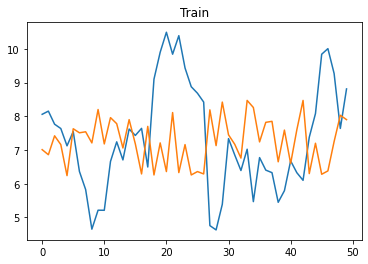

2/2 [==============================] - 0s 5ms/step


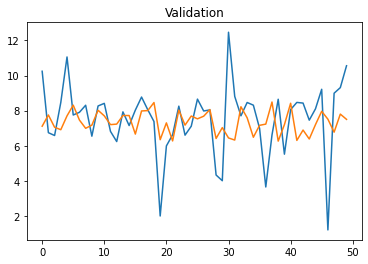

3/3 [==============================] - 0s 8ms/step


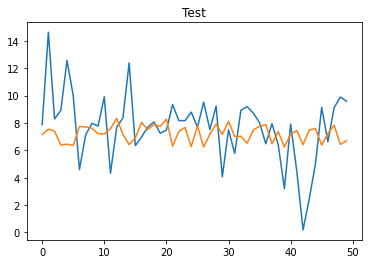

3/3 [==============================] - 0s 29ms/step


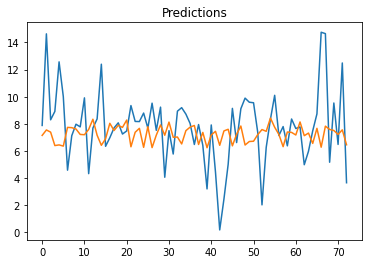

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 39.9548 - root_mean_squared_error: 6.3210

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 35s 3s/step - loss: 39.8562 - root_mean_squared_error: 6.3132 - val_loss: 37.5249 - val_root_mean_squared_error: 6.1258
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 37.3857 - root_mean_squared_error: 6.1144

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 37.3857 - root_mean_squared_error: 6.1144 - val_loss: 35.1530 - val_root_mean_squared_error: 5.9290
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 35.0859 - root_mean_squared_error: 5.9233

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 35.0029 - root_mean_squared_error: 5.9163 - val_loss: 32.8406 - val_root_mean_squared_error: 5.7307
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 32.9586 - root_mean_squared_error: 5.7410

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 32.6812 - root_mean_squared_error: 5.7167 - val_loss: 30.6067 - val_root_mean_squared_error: 5.5323
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 30.4338 - root_mean_squared_error: 5.5167

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 30.4338 - root_mean_squared_error: 5.5167 - val_loss: 28.4343 - val_root_mean_squared_error: 5.3324
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 28.1828 - root_mean_squared_error: 5.3087

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 28.2469 - root_mean_squared_error: 5.3148 - val_loss: 26.3262 - val_root_mean_squared_error: 5.1309
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 26.1226 - root_mean_squared_error: 5.1110

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 26.1226 - root_mean_squared_error: 5.1110 - val_loss: 24.2558 - val_root_mean_squared_error: 4.9250
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 24.0432 - root_mean_squared_error: 4.9034

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 24.0432 - root_mean_squared_error: 4.9034 - val_loss: 22.2654 - val_root_mean_squared_error: 4.7186
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 22.0181 - root_mean_squared_error: 4.6923

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 22.0603 - root_mean_squared_error: 4.6968 - val_loss: 20.3761 - val_root_mean_squared_error: 4.5140
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 20.1712 - root_mean_squared_error: 4.4912

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 20.1712 - root_mean_squared_error: 4.4912 - val_loss: 18.5913 - val_root_mean_squared_error: 4.3118
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 18.3844 - root_mean_squared_error: 4.2877

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 18.3957 - root_mean_squared_error: 4.2890 - val_loss: 16.9038 - val_root_mean_squared_error: 4.1114
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 16.7401 - root_mean_squared_error: 4.0915

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 16.7096 - root_mean_squared_error: 4.0877 - val_loss: 15.3044 - val_root_mean_squared_error: 3.9121
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 15.4682 - root_mean_squared_error: 3.9330

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 15.1213 - root_mean_squared_error: 3.8886 - val_loss: 13.7954 - val_root_mean_squared_error: 3.7142
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 13.6163 - root_mean_squared_error: 3.6900

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 13.6163 - root_mean_squared_error: 3.6900 - val_loss: 12.3778 - val_root_mean_squared_error: 3.5182
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 12.2079 - root_mean_squared_error: 3.4940

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 12.2079 - root_mean_squared_error: 3.4940 - val_loss: 11.0535 - val_root_mean_squared_error: 3.3247
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 10.8937 - root_mean_squared_error: 3.3006

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 10.8937 - root_mean_squared_error: 3.3006 - val_loss: 9.8196 - val_root_mean_squared_error: 3.1336
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 9.8076 - root_mean_squared_error: 3.1317

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 9.6701 - root_mean_squared_error: 3.1097 - val_loss: 8.6813 - val_root_mean_squared_error: 2.9464
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 8.5409 - root_mean_squared_error: 2.9225

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 8.5434 - root_mean_squared_error: 2.9229 - val_loss: 7.6408 - val_root_mean_squared_error: 2.7642
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 7.5367 - root_mean_squared_error: 2.7453

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 7.5185 - root_mean_squared_error: 2.7420 - val_loss: 6.6915 - val_root_mean_squared_error: 2.5868
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 6.5871 - root_mean_squared_error: 2.5665

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 6.5856 - root_mean_squared_error: 2.5663 - val_loss: 5.8312 - val_root_mean_squared_error: 2.4148
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 5.7508 - root_mean_squared_error: 2.3981

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 5.7420 - root_mean_squared_error: 2.3963 - val_loss: 5.0557 - val_root_mean_squared_error: 2.2485
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 4.9883 - root_mean_squared_error: 2.2335

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 4.9850 - root_mean_squared_error: 2.2327 - val_loss: 4.3662 - val_root_mean_squared_error: 2.0895
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 4.3002 - root_mean_squared_error: 2.0737

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 4.3070 - root_mean_squared_error: 2.0753 - val_loss: 3.7606 - val_root_mean_squared_error: 1.9392
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 3.8490 - root_mean_squared_error: 1.9619

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 3.7166 - root_mean_squared_error: 1.9279 - val_loss: 3.2283 - val_root_mean_squared_error: 1.7967
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 3.2029 - root_mean_squared_error: 1.7897

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 3.1976 - root_mean_squared_error: 1.7882 - val_loss: 2.7647 - val_root_mean_squared_error: 1.6627
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2.7439 - root_mean_squared_error: 1.6565

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2.7439 - root_mean_squared_error: 1.6565 - val_loss: 2.3691 - val_root_mean_squared_error: 1.5392
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2.2913 - root_mean_squared_error: 1.5137

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2.3550 - root_mean_squared_error: 1.5346 - val_loss: 2.0328 - val_root_mean_squared_error: 1.4258
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2.0426 - root_mean_squared_error: 1.4292

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2.0290 - root_mean_squared_error: 1.4244 - val_loss: 1.7456 - val_root_mean_squared_error: 1.3212
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 1.7044 - root_mean_squared_error: 1.3055

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 1.7471 - root_mean_squared_error: 1.3218 - val_loss: 1.5045 - val_root_mean_squared_error: 1.2266
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5222 - root_mean_squared_error: 1.2338

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.5130 - root_mean_squared_error: 1.2301 - val_loss: 1.2992 - val_root_mean_squared_error: 1.1398
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3285 - root_mean_squared_error: 1.1526

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1.3108 - root_mean_squared_error: 1.1449 - val_loss: 1.1286 - val_root_mean_squared_error: 1.0624
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1307 - root_mean_squared_error: 1.0633

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1.1435 - root_mean_squared_error: 1.0693 - val_loss: 0.9851 - val_root_mean_squared_error: 0.9925
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9928 - root_mean_squared_error: 0.9964

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1.0010 - root_mean_squared_error: 1.0005 - val_loss: 0.8626 - val_root_mean_squared_error: 0.9288
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8976 - root_mean_squared_error: 0.9474

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.8782 - root_mean_squared_error: 0.9371 - val_loss: 0.7625 - val_root_mean_squared_error: 0.8732
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7883 - root_mean_squared_error: 0.8878

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.7808 - root_mean_squared_error: 0.8836 - val_loss: 0.6830 - val_root_mean_squared_error: 0.8264
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7072 - root_mean_squared_error: 0.8410

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.7001 - root_mean_squared_error: 0.8367 - val_loss: 0.6193 - val_root_mean_squared_error: 0.7869
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 0.6609 - root_mean_squared_error: 0.8129

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.6360 - root_mean_squared_error: 0.7975 - val_loss: 0.5679 - val_root_mean_squared_error: 0.7536
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5870 - root_mean_squared_error: 0.7661

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.5838 - root_mean_squared_error: 0.7641 - val_loss: 0.5254 - val_root_mean_squared_error: 0.7248
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5376 - root_mean_squared_error: 0.7332

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.5384 - root_mean_squared_error: 0.7337 - val_loss: 0.4915 - val_root_mean_squared_error: 0.7011
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 0.5029 - root_mean_squared_error: 0.7091

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.5029 - root_mean_squared_error: 0.7091 - val_loss: 0.4627 - val_root_mean_squared_error: 0.6802
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4747 - root_mean_squared_error: 0.6890

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.4719 - root_mean_squared_error: 0.6869 - val_loss: 0.4393 - val_root_mean_squared_error: 0.6628
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4305 - root_mean_squared_error: 0.6561

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 0.4467 - root_mean_squared_error: 0.6684 - val_loss: 0.4221 - val_root_mean_squared_error: 0.6497
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.4293 - root_mean_squared_error: 0.6552

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 0.4293 - root_mean_squared_error: 0.6552 - val_loss: 0.4078 - val_root_mean_squared_error: 0.6386
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 0.4129 - root_mean_squared_error: 0.6426

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 0.4129 - root_mean_squared_error: 0.6426 - val_loss: 0.3971 - val_root_mean_squared_error: 0.6302
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3958 - root_mean_squared_error: 0.6291

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.4002 - root_mean_squared_error: 0.6326 - val_loss: 0.3894 - val_root_mean_squared_error: 0.6240
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3894 - root_mean_squared_error: 0.6241

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.3914 - root_mean_squared_error: 0.6256 - val_loss: 0.3829 - val_root_mean_squared_error: 0.6188
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.3832 - root_mean_squared_error: 0.6191

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.3832 - root_mean_squared_error: 0.6191 - val_loss: 0.3774 - val_root_mean_squared_error: 0.6144
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.3767 - root_mean_squared_error: 0.6138

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.3767 - root_mean_squared_error: 0.6138 - val_loss: 0.3735 - val_root_mean_squared_error: 0.6111
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.3720 - root_mean_squared_error: 0.6100

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 0.3720 - root_mean_squared_error: 0.6100 - val_loss: 0.3704 - val_root_mean_squared_error: 0.6086
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.3685 - root_mean_squared_error: 0.6070

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 12ms/step


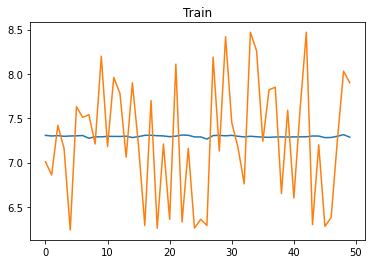

2/2 [==============================] - 2s 9ms/step


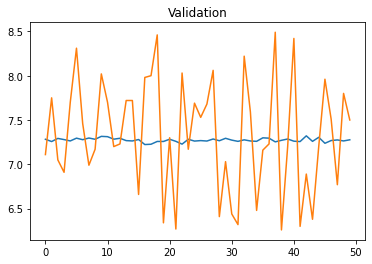

3/3 [==============================] - 0s 64ms/step


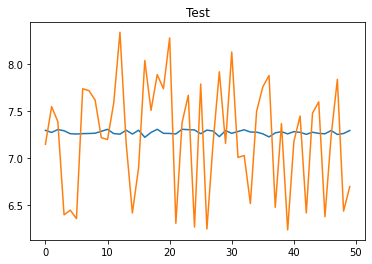

3/3 [==============================] - 0s 6ms/step


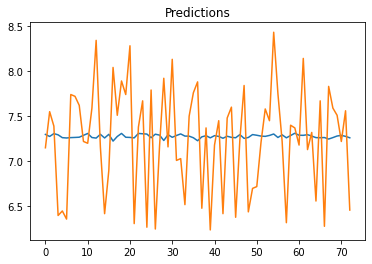

In [18]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 62.8741 - root_mean_squared_error: 7.9293

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 52s 5s/step - loss: 62.8741 - root_mean_squared_error: 7.9293 - val_loss: 61.0838 - val_root_mean_squared_error: 7.8156
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 61.5485 - root_mean_squared_error: 7.8453

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 61.5485 - root_mean_squared_error: 7.8453 - val_loss: 59.7793 - val_root_mean_squared_error: 7.7317
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 60.2416 - root_mean_squared_error: 7.7615

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 60.2416 - root_mean_squared_error: 7.7615 - val_loss: 58.5041 - val_root_mean_squared_error: 7.6488
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 59.3508 - root_mean_squared_error: 7.7039

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 58.9698 - root_mean_squared_error: 7.6792 - val_loss: 57.2551 - val_root_mean_squared_error: 7.5667
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 57.8257 - root_mean_squared_error: 7.6043

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 57.7179 - root_mean_squared_error: 7.5972 - val_loss: 56.0533 - val_root_mean_squared_error: 7.4869
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 56.5406 - root_mean_squared_error: 7.5194

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 56.5406 - root_mean_squared_error: 7.5194 - val_loss: 54.8977 - val_root_mean_squared_error: 7.4093
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 55.9910 - root_mean_squared_error: 7.4827

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 55.5222 - root_mean_squared_error: 7.4513 - val_loss: 54.4176 - val_root_mean_squared_error: 7.3768
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 54.9963 - root_mean_squared_error: 7.4159

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 55.2879 - root_mean_squared_error: 7.4356 - val_loss: 54.2525 - val_root_mean_squared_error: 7.3656
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 55.1104 - root_mean_squared_error: 7.4236

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 55.1104 - root_mean_squared_error: 7.4236 - val_loss: 54.1207 - val_root_mean_squared_error: 7.3567
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 55.0429 - root_mean_squared_error: 7.4191

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 55.0429 - root_mean_squared_error: 7.4191 - val_loss: 54.1093 - val_root_mean_squared_error: 7.3559
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 55.1087 - root_mean_squared_error: 7.4235

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 55.0314 - root_mean_squared_error: 7.4183 - val_loss: 54.0978 - val_root_mean_squared_error: 7.3551
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 54.9219 - root_mean_squared_error: 7.4109

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 55.0198 - root_mean_squared_error: 7.4175 - val_loss: 54.0863 - val_root_mean_squared_error: 7.3543
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 54.9485 - root_mean_squared_error: 7.4127

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 55.0083 - root_mean_squared_error: 7.4168 - val_loss: 54.0748 - val_root_mean_squared_error: 7.3536
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 55.0807 - root_mean_squared_error: 7.4216

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 54.9967 - root_mean_squared_error: 7.4160 - val_loss: 54.0633 - val_root_mean_squared_error: 7.3528
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 54.9349 - root_mean_squared_error: 7.4118

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 54.9850 - root_mean_squared_error: 7.4152 - val_loss: 54.0518 - val_root_mean_squared_error: 7.3520
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 54.9735 - root_mean_squared_error: 7.4144

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 54.9735 - root_mean_squared_error: 7.4144 - val_loss: 54.0403 - val_root_mean_squared_error: 7.3512
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 54.8263 - root_mean_squared_error: 7.4045

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.9618 - root_mean_squared_error: 7.4136 - val_loss: 54.0287 - val_root_mean_squared_error: 7.3504
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 54.9501 - root_mean_squared_error: 7.4128

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 54.9501 - root_mean_squared_error: 7.4128 - val_loss: 54.0171 - val_root_mean_squared_error: 7.3496
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 54.5382 - root_mean_squared_error: 7.3850

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 54.9384 - root_mean_squared_error: 7.4120 - val_loss: 54.0056 - val_root_mean_squared_error: 7.3488
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 54.9096 - root_mean_squared_error: 7.4101

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 54.9267 - root_mean_squared_error: 7.4113 - val_loss: 53.9939 - val_root_mean_squared_error: 7.3481
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 54.7541 - root_mean_squared_error: 7.3996

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 54.9150 - root_mean_squared_error: 7.4105 - val_loss: 53.9824 - val_root_mean_squared_error: 7.3473
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 54.9033 - root_mean_squared_error: 7.4097

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 54.9033 - root_mean_squared_error: 7.4097 - val_loss: 53.9708 - val_root_mean_squared_error: 7.3465
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 54.8539 - root_mean_squared_error: 7.4063

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 54.8917 - root_mean_squared_error: 7.4089 - val_loss: 53.9592 - val_root_mean_squared_error: 7.3457
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 54.8800 - root_mean_squared_error: 7.4081

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.8800 - root_mean_squared_error: 7.4081 - val_loss: 53.9476 - val_root_mean_squared_error: 7.3449
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 55.0515 - root_mean_squared_error: 7.4197

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 54.8683 - root_mean_squared_error: 7.4073 - val_loss: 53.9361 - val_root_mean_squared_error: 7.3441
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 54.7700 - root_mean_squared_error: 7.4007

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 54.8566 - root_mean_squared_error: 7.4065 - val_loss: 53.9245 - val_root_mean_squared_error: 7.3433
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 54.8450 - root_mean_squared_error: 7.4057

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 54.8450 - root_mean_squared_error: 7.4057 - val_loss: 53.9130 - val_root_mean_squared_error: 7.3425
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 54.8844 - root_mean_squared_error: 7.4084

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 54.8333 - root_mean_squared_error: 7.4050 - val_loss: 53.9014 - val_root_mean_squared_error: 7.3418
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 55.0757 - root_mean_squared_error: 7.4213

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 54.8217 - root_mean_squared_error: 7.4042 - val_loss: 53.8898 - val_root_mean_squared_error: 7.3410
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 54.9667 - root_mean_squared_error: 7.4140

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 54.8100 - root_mean_squared_error: 7.4034 - val_loss: 53.8783 - val_root_mean_squared_error: 7.3402
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 54.8176 - root_mean_squared_error: 7.4039

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 54.7984 - root_mean_squared_error: 7.4026 - val_loss: 53.8667 - val_root_mean_squared_error: 7.3394
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 54.9553 - root_mean_squared_error: 7.4132

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 54.7866 - root_mean_squared_error: 7.4018 - val_loss: 53.8551 - val_root_mean_squared_error: 7.3386
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 54.7749 - root_mean_squared_error: 7.4010

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.7749 - root_mean_squared_error: 7.4010 - val_loss: 53.8435 - val_root_mean_squared_error: 7.3378
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 54.2993 - root_mean_squared_error: 7.3688

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 54.7633 - root_mean_squared_error: 7.4002 - val_loss: 53.8320 - val_root_mean_squared_error: 7.3370
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 54.5022 - root_mean_squared_error: 7.3826

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 54.7516 - root_mean_squared_error: 7.3994 - val_loss: 53.8203 - val_root_mean_squared_error: 7.3362
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 54.7371 - root_mean_squared_error: 7.3985

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 54.7399 - root_mean_squared_error: 7.3986 - val_loss: 53.8087 - val_root_mean_squared_error: 7.3354
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 54.7084 - root_mean_squared_error: 7.3965

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.7282 - root_mean_squared_error: 7.3978 - val_loss: 53.7971 - val_root_mean_squared_error: 7.3346
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 54.6795 - root_mean_squared_error: 7.3946

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 54.7164 - root_mean_squared_error: 7.3971 - val_loss: 53.7855 - val_root_mean_squared_error: 7.3339
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 55.2102 - root_mean_squared_error: 7.4304

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 54.7047 - root_mean_squared_error: 7.3963 - val_loss: 53.7738 - val_root_mean_squared_error: 7.3331
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 54.6378 - root_mean_squared_error: 7.3917

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 54.6929 - root_mean_squared_error: 7.3955 - val_loss: 53.7622 - val_root_mean_squared_error: 7.3323
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 54.5188 - root_mean_squared_error: 7.3837

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 54.6813 - root_mean_squared_error: 7.3947 - val_loss: 53.7506 - val_root_mean_squared_error: 7.3315
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 54.8797 - root_mean_squared_error: 7.4081

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 54.6696 - root_mean_squared_error: 7.3939 - val_loss: 53.7390 - val_root_mean_squared_error: 7.3307
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 54.6206 - root_mean_squared_error: 7.3906

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 54.6578 - root_mean_squared_error: 7.3931 - val_loss: 53.7273 - val_root_mean_squared_error: 7.3299
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 54.6460 - root_mean_squared_error: 7.3923

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 54.6460 - root_mean_squared_error: 7.3923 - val_loss: 53.7157 - val_root_mean_squared_error: 7.3291
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 54.7143 - root_mean_squared_error: 7.3969

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 54.6343 - root_mean_squared_error: 7.3915 - val_loss: 53.7040 - val_root_mean_squared_error: 7.3283
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 54.5038 - root_mean_squared_error: 7.3827

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 54.6226 - root_mean_squared_error: 7.3907 - val_loss: 53.6924 - val_root_mean_squared_error: 7.3275
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 54.6109 - root_mean_squared_error: 7.3899

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 54.6109 - root_mean_squared_error: 7.3899 - val_loss: 53.6808 - val_root_mean_squared_error: 7.3267
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 54.6233 - root_mean_squared_error: 7.3908

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.5991 - root_mean_squared_error: 7.3891 - val_loss: 53.6692 - val_root_mean_squared_error: 7.3259
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 54.5875 - root_mean_squared_error: 7.3883

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 54.5875 - root_mean_squared_error: 7.3883 - val_loss: 53.6576 - val_root_mean_squared_error: 7.3251
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 54.5665 - root_mean_squared_error: 7.3869

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 30ms/step


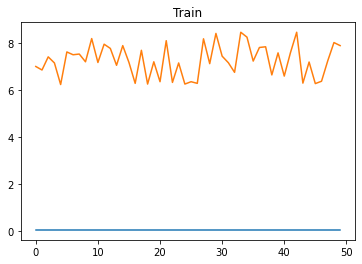

2/2 [==============================] - 2s 6ms/step


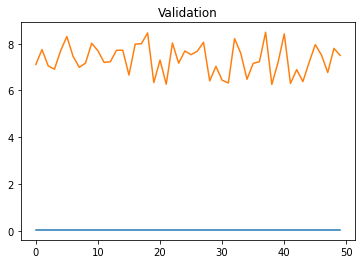

3/3 [==============================] - 0s 7ms/step


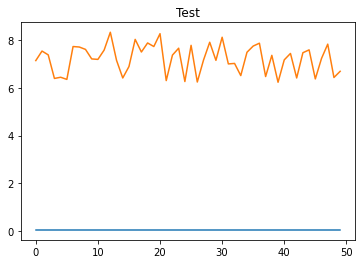

3/3 [==============================] - 0s 19ms/step


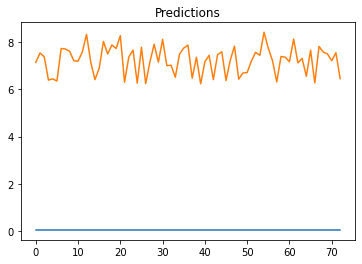

In [19]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 41.5736 - root_mean_squared_error: 6.4478 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 28s 3s/step - loss: 41.5736 - root_mean_squared_error: 6.4478 - val_loss: 38.3164 - val_root_mean_squared_error: 6.1900
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 38.4684 - root_mean_squared_error: 6.2023INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 37.6057 - root_mean_squared_error: 6.1323 - val_loss: 34.6453 - val_root_mean_squared_error: 5.8860
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 34.0286 - root_mean_squared_error: 5.8334INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 33.9690 - root_mean_squared_error: 5.8283 - val_loss: 31.2760 - val_root_mean_squared_error: 5.5925
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 30.9294 - root_mean_squared_error: 5.5614INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 30.6441 - root_mean_squared_error: 5.5357 - val_loss: 28.1737 - val_root_mean_squared_error: 5.3079
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 27.5339 - root_mean_squared_error: 5.2473INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 27.5884 - root_mean_squared_error: 5.2525 - val_loss: 25.3295 - val_root_mean_squared_error: 5.0328
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 24.9494 - root_mean_squared_error: 4.9949INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 24.7870 - root_mean_squared_error: 4.9787 - val_loss: 22.7223 - val_root_mean_squared_error: 4.7668
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 22.2333 - root_mean_squared_error: 4.7152INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 22.2333 - root_mean_squared_error: 4.7152 - val_loss: 20.3367 - val_root_mean_squared_error: 4.5096
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 19.8922 - root_mean_squared_error: 4.4601INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 19.8922 - root_mean_squared_error: 4.4601 - val_loss: 18.1595 - val_root_mean_squared_error: 4.2614
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 18.1293 - root_mean_squared_error: 4.2578INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 17.7423 - root_mean_squared_error: 4.2122 - val_loss: 16.1200 - val_root_mean_squared_error: 4.0150
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 15.8724 - root_mean_squared_error: 3.9840INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 15.7008 - root_mean_squared_error: 3.9624 - val_loss: 14.2373 - val_root_mean_squared_error: 3.7732
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 13.9823 - root_mean_squared_error: 3.7393INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 13.8983 - root_mean_squared_error: 3.7280 - val_loss: 12.6003 - val_root_mean_squared_error: 3.5497
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 12.7048 - root_mean_squared_error: 3.5644INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 12.3062 - root_mean_squared_error: 3.5080 - val_loss: 11.1188 - val_root_mean_squared_error: 3.3345
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 11.0448 - root_mean_squared_error: 3.3234INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 10.8627 - root_mean_squared_error: 3.2959 - val_loss: 9.7884 - val_root_mean_squared_error: 3.1286
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 9.8582 - root_mean_squared_error: 3.1398 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 9.5669 - root_mean_squared_error: 3.0930 - val_loss: 8.5909 - val_root_mean_squared_error: 2.9310
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 8.3854 - root_mean_squared_error: 2.8958INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 8.3992 - root_mean_squared_error: 2.8981 - val_loss: 7.5207 - val_root_mean_squared_error: 2.7424
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 7.3527 - root_mean_squared_error: 2.7116INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 7.3527 - root_mean_squared_error: 2.7116 - val_loss: 6.5692 - val_root_mean_squared_error: 2.5630
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 6.7218 - root_mean_squared_error: 2.5926INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.4306 - root_mean_squared_error: 2.5359 - val_loss: 5.7225 - val_root_mean_squared_error: 2.3922
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 5.6023 - root_mean_squared_error: 2.3669INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 5.6023 - root_mean_squared_error: 2.3669 - val_loss: 4.9771 - val_root_mean_squared_error: 2.2309
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 4.9178 - root_mean_squared_error: 2.2176INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 4.8733 - root_mean_squared_error: 2.2076 - val_loss: 4.3160 - val_root_mean_squared_error: 2.0775
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 4.2453 - root_mean_squared_error: 2.0604INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 4.2297 - root_mean_squared_error: 2.0566 - val_loss: 3.7483 - val_root_mean_squared_error: 1.9361
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 3.8682 - root_mean_squared_error: 1.9668INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 3.6784 - root_mean_squared_error: 1.9179 - val_loss: 3.2491 - val_root_mean_squared_error: 1.8025
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 3.1894 - root_mean_squared_error: 1.7859INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 3.1839 - root_mean_squared_error: 1.7844 - val_loss: 2.8133 - val_root_mean_squared_error: 1.6773
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2.7563 - root_mean_squared_error: 1.6602INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2.7611 - root_mean_squared_error: 1.6617 - val_loss: 2.4347 - val_root_mean_squared_error: 1.5604
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2.3865 - root_mean_squared_error: 1.5448INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.3865 - root_mean_squared_error: 1.5448 - val_loss: 2.1055 - val_root_mean_squared_error: 1.4510
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2.2007 - root_mean_squared_error: 1.4835INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2.0603 - root_mean_squared_error: 1.4354 - val_loss: 1.8059 - val_root_mean_squared_error: 1.3439
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 1.7657 - root_mean_squared_error: 1.3288INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.7591 - root_mean_squared_error: 1.3263 - val_loss: 1.5630 - val_root_mean_squared_error: 1.2502
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4772 - root_mean_squared_error: 1.2154INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.5233 - root_mean_squared_error: 1.2342 - val_loss: 1.3618 - val_root_mean_squared_error: 1.1670
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3312 - root_mean_squared_error: 1.1538INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3269 - root_mean_squared_error: 1.1519 - val_loss: 1.1929 - val_root_mean_squared_error: 1.0922
Epoch 29/50
2/8 [======>.......................] - ETA: 0s - loss: 0.9758 - root_mean_squared_error: 0.9878INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.1542 - root_mean_squared_error: 1.0743 - val_loss: 1.0522 - val_root_mean_squared_error: 1.0257
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0132 - root_mean_squared_error: 1.0066INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.0164 - root_mean_squared_error: 1.0082 - val_loss: 0.9316 - val_root_mean_squared_error: 0.9652
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 0.8949 - root_mean_squared_error: 0.9460INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 0.8949 - root_mean_squared_error: 0.9460 - val_loss: 0.8326 - val_root_mean_squared_error: 0.9125
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 0.7629 - root_mean_squared_error: 0.8734INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 965ms/step - loss: 0.7963 - root_mean_squared_error: 0.8923 - val_loss: 0.7541 - val_root_mean_squared_error: 0.8684
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7088 - root_mean_squared_error: 0.8419INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.7148 - root_mean_squared_error: 0.8455 - val_loss: 0.6905 - val_root_mean_squared_error: 0.8309
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 0.6603 - root_mean_squared_error: 0.8126INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.6503 - root_mean_squared_error: 0.8064 - val_loss: 0.6366 - val_root_mean_squared_error: 0.7979
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6047 - root_mean_squared_error: 0.7776INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.5952 - root_mean_squared_error: 0.7715 - val_loss: 0.5915 - val_root_mean_squared_error: 0.7691
Epoch 36/50
4/8 [==============>...............] - ETA: 0s - loss: 0.6100 - root_mean_squared_error: 0.7810INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 0.5487 - root_mean_squared_error: 0.7407 - val_loss: 0.5600 - val_root_mean_squared_error: 0.7483
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5108 - root_mean_squared_error: 0.7147INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5140 - root_mean_squared_error: 0.7169 - val_loss: 0.5355 - val_root_mean_squared_error: 0.7318
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 0.5255 - root_mean_squared_error: 0.7249INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4867 - root_mean_squared_error: 0.6977 - val_loss: 0.5155 - val_root_mean_squared_error: 0.7180
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4467 - root_mean_squared_error: 0.6684INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.4647 - root_mean_squared_error: 0.6817 - val_loss: 0.4989 - val_root_mean_squared_error: 0.7063
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 0.4789 - root_mean_squared_error: 0.6920INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.4463 - root_mean_squared_error: 0.6681 - val_loss: 0.4858 - val_root_mean_squared_error: 0.6970
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4326 - root_mean_squared_error: 0.6577INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4317 - root_mean_squared_error: 0.6570 - val_loss: 0.4772 - val_root_mean_squared_error: 0.6908
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 0.4106 - root_mean_squared_error: 0.6408INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.4215 - root_mean_squared_error: 0.6492 - val_loss: 0.4696 - val_root_mean_squared_error: 0.6853
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.4136 - root_mean_squared_error: 0.6431INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4136 - root_mean_squared_error: 0.6431 - val_loss: 0.4641 - val_root_mean_squared_error: 0.6812
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 0.3850 - root_mean_squared_error: 0.6205INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.4065 - root_mean_squared_error: 0.6376 - val_loss: 0.4593 - val_root_mean_squared_error: 0.6777
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4046 - root_mean_squared_error: 0.6360INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.4005 - root_mean_squared_error: 0.6328 - val_loss: 0.4555 - val_root_mean_squared_error: 0.6749
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 0.3801 - root_mean_squared_error: 0.6165INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.3957 - root_mean_squared_error: 0.6291 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6730
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.3861 - root_mean_squared_error: 0.6214INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.3927 - root_mean_squared_error: 0.6267 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6714
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3926 - root_mean_squared_error: 0.6265INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.3903 - root_mean_squared_error: 0.6247 - val_loss: 0.4491 - val_root_mean_squared_error: 0.6702
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3918 - root_mean_squared_error: 0.6259INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 0.3878 - root_mean_squared_error: 0.6227 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6693
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 0.3865 - root_mean_squared_error: 0.6217INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 7ms/step


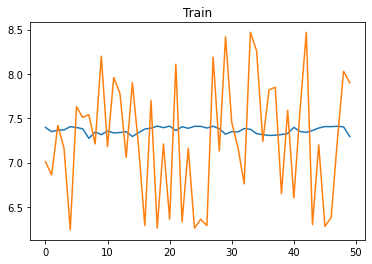

2/2 [==============================] - 1s 5ms/step


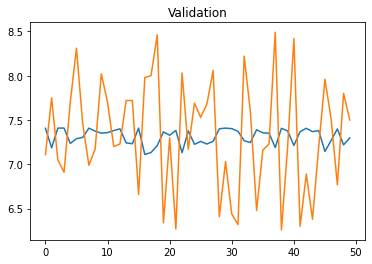

3/3 [==============================] - 0s 5ms/step


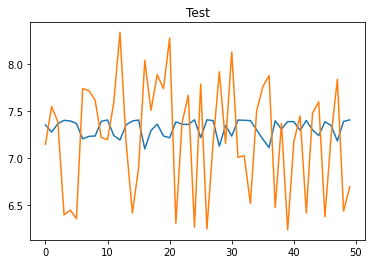

3/3 [==============================] - 0s 6ms/step


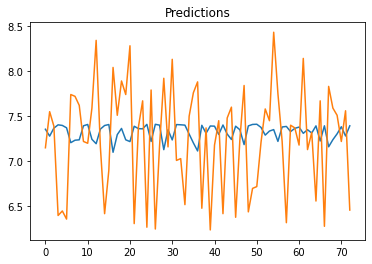

In [20]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 21777.3730 - root_mean_squared_error: 147.5716

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 17s 2s/step - loss: 21777.3730 - root_mean_squared_error: 147.5716 - val_loss: 745.7192 - val_root_mean_squared_error: 27.3079
Epoch 2/50
8/8 [==============================] - 1s 72ms/step - loss: 9184.8545 - root_mean_squared_error: 95.8376 - val_loss: 9735.8428 - val_root_mean_squared_error: 98.6704
Epoch 3/50
8/8 [==============================] - 0s 40ms/step - loss: 9220.2666 - root_mean_squared_error: 96.0222 - val_loss: 8873.1865 - val_root_mean_squared_error: 94.1976
Epoch 4/50
8/8 [==============================] - 0s 50ms/step - loss: 7175.1245 - root_mean_squared_error: 84.7061 - val_loss: 4465.8862 - val_root_mean_squared_error: 66.8273
Epoch 5/50
8/8 [==============================] - 0s 41ms/step - loss: 6507.9502 - root_mean_squared_error: 80.6719 - val_loss: 1523.3344 - val_root_mean_squared_error: 39.0299
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 6150.5601 - root_mean_squared_error: 78.4255

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 918ms/step - loss: 5745.8105 - root_mean_squared_error: 75.8011 - val_loss: 208.7804 - val_root_mean_squared_error: 14.4492
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 3690.8293 - root_mean_squared_error: 60.7522

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 814ms/step - loss: 3225.5347 - root_mean_squared_error: 56.7938 - val_loss: 166.6391 - val_root_mean_squared_error: 12.9089
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2461.8914 - root_mean_squared_error: 49.6175

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 846ms/step - loss: 2781.4990 - root_mean_squared_error: 52.7399 - val_loss: 160.9791 - val_root_mean_squared_error: 12.6878
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 1853.4988 - root_mean_squared_error: 43.0523

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1863.1932 - root_mean_squared_error: 43.1647 - val_loss: 158.0341 - val_root_mean_squared_error: 12.5712
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2164.5334 - root_mean_squared_error: 46.5245

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2164.5334 - root_mean_squared_error: 46.5245 - val_loss: 153.1999 - val_root_mean_squared_error: 12.3774
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 1535.6332 - root_mean_squared_error: 39.1872

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 872ms/step - loss: 1465.2485 - root_mean_squared_error: 38.2786 - val_loss: 144.3525 - val_root_mean_squared_error: 12.0147
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 1201.0710 - root_mean_squared_error: 34.6565

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 768ms/step - loss: 1170.8971 - root_mean_squared_error: 34.2184 - val_loss: 133.6328 - val_root_mean_squared_error: 11.5600
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 939.6660 - root_mean_squared_error: 30.6540

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 724ms/step - loss: 936.6655 - root_mean_squared_error: 30.6050 - val_loss: 123.6512 - val_root_mean_squared_error: 11.1199
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 489.9963 - root_mean_squared_error: 22.1359

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 910ms/step - loss: 533.6820 - root_mean_squared_error: 23.1016 - val_loss: 112.6627 - val_root_mean_squared_error: 10.6143
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 553.8171 - root_mean_squared_error: 23.5333

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 553.7076 - root_mean_squared_error: 23.5310 - val_loss: 100.3532 - val_root_mean_squared_error: 10.0176
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 548.1111 - root_mean_squared_error: 23.4118

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 909ms/step - loss: 542.2958 - root_mean_squared_error: 23.2872 - val_loss: 88.7701 - val_root_mean_squared_error: 9.4218
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 459.8642 - root_mean_squared_error: 21.4444

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 831ms/step - loss: 500.8621 - root_mean_squared_error: 22.3799 - val_loss: 77.8851 - val_root_mean_squared_error: 8.8253
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 304.0515 - root_mean_squared_error: 17.4371

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 691ms/step - loss: 301.1861 - root_mean_squared_error: 17.3547 - val_loss: 68.3530 - val_root_mean_squared_error: 8.2676
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 280.6592 - root_mean_squared_error: 16.7529

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 648ms/step - loss: 296.6312 - root_mean_squared_error: 17.2230 - val_loss: 60.1100 - val_root_mean_squared_error: 7.7531
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 730.9583 - root_mean_squared_error: 27.0362

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 792ms/step - loss: 603.6555 - root_mean_squared_error: 24.5694 - val_loss: 54.9571 - val_root_mean_squared_error: 7.4133
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 349.3082 - root_mean_squared_error: 18.6898

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 301.8990 - root_mean_squared_error: 17.3752 - val_loss: 54.1889 - val_root_mean_squared_error: 7.3613
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 300.4782 - root_mean_squared_error: 17.3343

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 723ms/step - loss: 300.8314 - root_mean_squared_error: 17.3445 - val_loss: 54.1855 - val_root_mean_squared_error: 7.3611
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 265.7248 - root_mean_squared_error: 16.3011

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 266.0663 - root_mean_squared_error: 16.3115 - val_loss: 54.1818 - val_root_mean_squared_error: 7.3608
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 195.0247 - root_mean_squared_error: 13.9651

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 788ms/step - loss: 191.3491 - root_mean_squared_error: 13.8329 - val_loss: 54.1780 - val_root_mean_squared_error: 7.3606
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 212.1099 - root_mean_squared_error: 14.5640

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 856ms/step - loss: 212.1099 - root_mean_squared_error: 14.5640 - val_loss: 54.1740 - val_root_mean_squared_error: 7.3603
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 348.6688 - root_mean_squared_error: 18.6727

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 983ms/step - loss: 340.0051 - root_mean_squared_error: 18.4392 - val_loss: 54.1702 - val_root_mean_squared_error: 7.3600
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 287.4795 - root_mean_squared_error: 16.9552

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 687ms/step - loss: 271.3382 - root_mean_squared_error: 16.4723 - val_loss: 54.1664 - val_root_mean_squared_error: 7.3598
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 269.8456 - root_mean_squared_error: 16.4270

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 889ms/step - loss: 224.8011 - root_mean_squared_error: 14.9934 - val_loss: 54.1624 - val_root_mean_squared_error: 7.3595
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 310.6897 - root_mean_squared_error: 17.6264

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 328.0501 - root_mean_squared_error: 18.1122 - val_loss: 54.1588 - val_root_mean_squared_error: 7.3593
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 190.7819 - root_mean_squared_error: 13.8124

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 845ms/step - loss: 169.1662 - root_mean_squared_error: 13.0064 - val_loss: 54.1553 - val_root_mean_squared_error: 7.3590
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 139.0977 - root_mean_squared_error: 11.7940

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 127.0556 - root_mean_squared_error: 11.2719 - val_loss: 54.1511 - val_root_mean_squared_error: 7.3587
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 158.0964 - root_mean_squared_error: 12.5736

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 852ms/step - loss: 158.0964 - root_mean_squared_error: 12.5736 - val_loss: 54.1468 - val_root_mean_squared_error: 7.3585
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 206.5178 - root_mean_squared_error: 14.3707

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 927ms/step - loss: 184.0374 - root_mean_squared_error: 13.5660 - val_loss: 54.1423 - val_root_mean_squared_error: 7.3581
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 183.1006 - root_mean_squared_error: 13.5315

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 607ms/step - loss: 180.6414 - root_mean_squared_error: 13.4403 - val_loss: 54.1376 - val_root_mean_squared_error: 7.3578
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 169.6959 - root_mean_squared_error: 13.0267

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 169.6959 - root_mean_squared_error: 13.0267 - val_loss: 54.1328 - val_root_mean_squared_error: 7.3575
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 133.7238 - root_mean_squared_error: 11.5639

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 944ms/step - loss: 134.9500 - root_mean_squared_error: 11.6168 - val_loss: 54.1282 - val_root_mean_squared_error: 7.3572
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 179.8780 - root_mean_squared_error: 13.4119

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 12s 2s/step - loss: 176.3535 - root_mean_squared_error: 13.2798 - val_loss: 54.1237 - val_root_mean_squared_error: 7.3569
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 97.2958 - root_mean_squared_error: 9.8639

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 97.1935 - root_mean_squared_error: 9.8587 - val_loss: 54.1192 - val_root_mean_squared_error: 7.3566
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 99.4826 - root_mean_squared_error: 9.9741

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 830ms/step - loss: 99.4826 - root_mean_squared_error: 9.9741 - val_loss: 54.1144 - val_root_mean_squared_error: 7.3563
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 108.8784 - root_mean_squared_error: 10.4345

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 787ms/step - loss: 107.0988 - root_mean_squared_error: 10.3489 - val_loss: 54.1097 - val_root_mean_squared_error: 7.3559
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 183.5437 - root_mean_squared_error: 13.5478

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 745ms/step - loss: 164.9599 - root_mean_squared_error: 12.8437 - val_loss: 54.1048 - val_root_mean_squared_error: 7.3556
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 160.6130 - root_mean_squared_error: 12.6733

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 12s 2s/step - loss: 157.2306 - root_mean_squared_error: 12.5392 - val_loss: 54.0999 - val_root_mean_squared_error: 7.3553
Epoch 43/50
4/8 [==============>...............] - ETA: 0s - loss: 86.0503 - root_mean_squared_error: 9.2763

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 964ms/step - loss: 113.1172 - root_mean_squared_error: 10.6357 - val_loss: 54.0949 - val_root_mean_squared_error: 7.3549
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 137.2044 - root_mean_squared_error: 11.7134

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 778ms/step - loss: 127.7509 - root_mean_squared_error: 11.3027 - val_loss: 54.0899 - val_root_mean_squared_error: 7.3546
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 115.9649 - root_mean_squared_error: 10.7687

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 722ms/step - loss: 124.4389 - root_mean_squared_error: 11.1552 - val_loss: 54.0845 - val_root_mean_squared_error: 7.3542
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 89.6328 - root_mean_squared_error: 9.4675

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 537ms/step - loss: 95.8812 - root_mean_squared_error: 9.7919 - val_loss: 54.0797 - val_root_mean_squared_error: 7.3539
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 104.3618 - root_mean_squared_error: 10.2158

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 98.4047 - root_mean_squared_error: 9.9199 - val_loss: 54.0747 - val_root_mean_squared_error: 7.3536
Epoch 48/50
4/8 [==============>...............] - ETA: 0s - loss: 95.3081 - root_mean_squared_error: 9.7626  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 610ms/step - loss: 87.7538 - root_mean_squared_error: 9.3677 - val_loss: 54.0694 - val_root_mean_squared_error: 7.3532
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 101.2964 - root_mean_squared_error: 10.0646

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 566ms/step - loss: 92.3622 - root_mean_squared_error: 9.6105 - val_loss: 54.0641 - val_root_mean_squared_error: 7.3528
Epoch 50/50
4/8 [==============>...............] - ETA: 0s - loss: 189.4762 - root_mean_squared_error: 13.7650

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 10ms/step


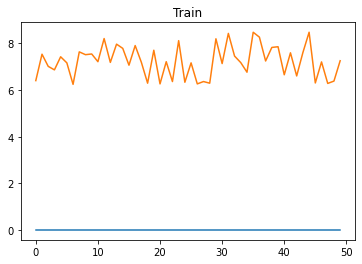

2/2 [==============================] - 0s 4ms/step


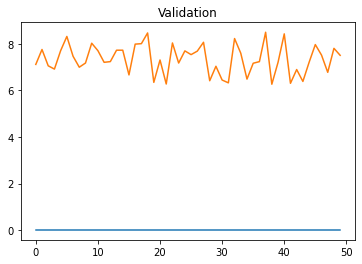

3/3 [==============================] - 0s 31ms/step


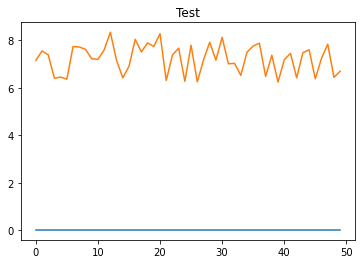

3/3 [==============================] - 0s 4ms/step


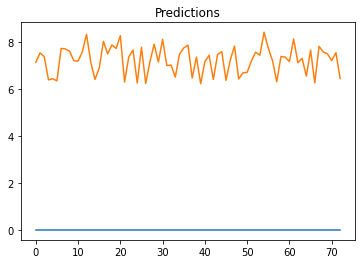

In [21]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
auto_cnn_mse

52.713160797264244

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 41.2253 - root_mean_squared_error: 6.4207

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 44s 4s/step - loss: 41.3244 - root_mean_squared_error: 6.4284 - val_loss: 38.3203 - val_root_mean_squared_error: 6.1903
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 38.0986 - root_mean_squared_error: 6.1724

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 38.0986 - root_mean_squared_error: 6.1724 - val_loss: 35.6645 - val_root_mean_squared_error: 5.9720
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 35.6376 - root_mean_squared_error: 5.9697

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 35.6673 - root_mean_squared_error: 5.9722 - val_loss: 33.1643 - val_root_mean_squared_error: 5.7588
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 33.3429 - root_mean_squared_error: 5.7743

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 33.2574 - root_mean_squared_error: 5.7669 - val_loss: 30.7590 - val_root_mean_squared_error: 5.5461
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 30.5448 - root_mean_squared_error: 5.5267

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 30.5525 - root_mean_squared_error: 5.5274 - val_loss: 28.4449 - val_root_mean_squared_error: 5.3334
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 28.3121 - root_mean_squared_error: 5.3209

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 28.3121 - root_mean_squared_error: 5.3209 - val_loss: 26.1741 - val_root_mean_squared_error: 5.1161
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 26.5501 - root_mean_squared_error: 5.1527

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 26.1891 - root_mean_squared_error: 5.1175 - val_loss: 24.0436 - val_root_mean_squared_error: 4.9034
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 24.6893 - root_mean_squared_error: 4.9688

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 24.6051 - root_mean_squared_error: 4.9604 - val_loss: 22.0409 - val_root_mean_squared_error: 4.6948
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 22.0572 - root_mean_squared_error: 4.6965

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 21.9338 - root_mean_squared_error: 4.6833 - val_loss: 20.1391 - val_root_mean_squared_error: 4.4877
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 20.0246 - root_mean_squared_error: 4.4749

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 20.0246 - root_mean_squared_error: 4.4749 - val_loss: 18.3331 - val_root_mean_squared_error: 4.2817
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 18.6213 - root_mean_squared_error: 4.3152

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 18.6213 - root_mean_squared_error: 4.3152 - val_loss: 16.6115 - val_root_mean_squared_error: 4.0757
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 17.0379 - root_mean_squared_error: 4.1277

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 16.8205 - root_mean_squared_error: 4.1013 - val_loss: 14.9823 - val_root_mean_squared_error: 3.8707
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 15.5289 - root_mean_squared_error: 3.9407

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 15.0094 - root_mean_squared_error: 3.8742 - val_loss: 13.4369 - val_root_mean_squared_error: 3.6656
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 13.4202 - root_mean_squared_error: 3.6634

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 13.4202 - root_mean_squared_error: 3.6634 - val_loss: 12.0247 - val_root_mean_squared_error: 3.4677
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 12.2861 - root_mean_squared_error: 3.5051

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 12.2735 - root_mean_squared_error: 3.5034 - val_loss: 10.6949 - val_root_mean_squared_error: 3.2703
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 10.7886 - root_mean_squared_error: 3.2846

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 10.7329 - root_mean_squared_error: 3.2761 - val_loss: 9.4616 - val_root_mean_squared_error: 3.0760
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 9.7831 - root_mean_squared_error: 3.1278

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 9.7393 - root_mean_squared_error: 3.1208 - val_loss: 8.3217 - val_root_mean_squared_error: 2.8847
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 8.6129 - root_mean_squared_error: 2.9348

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 8.5849 - root_mean_squared_error: 2.9300 - val_loss: 7.2723 - val_root_mean_squared_error: 2.6967
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 7.5971 - root_mean_squared_error: 2.7563

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 7.6233 - root_mean_squared_error: 2.7610 - val_loss: 6.3251 - val_root_mean_squared_error: 2.5150
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 6.6585 - root_mean_squared_error: 2.5804

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 6.5578 - root_mean_squared_error: 2.5608 - val_loss: 5.4682 - val_root_mean_squared_error: 2.3384
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 5.5484 - root_mean_squared_error: 2.3555

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 5.4460 - root_mean_squared_error: 2.3337 - val_loss: 4.7074 - val_root_mean_squared_error: 2.1697
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 5.2535 - root_mean_squared_error: 2.2920

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 5.1700 - root_mean_squared_error: 2.2738 - val_loss: 4.0138 - val_root_mean_squared_error: 2.0035
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 4.2629 - root_mean_squared_error: 2.0647

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 4.1985 - root_mean_squared_error: 2.0490 - val_loss: 3.4180 - val_root_mean_squared_error: 1.8488
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 3.8643 - root_mean_squared_error: 1.9658

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 3.7322 - root_mean_squared_error: 1.9319 - val_loss: 2.9289 - val_root_mean_squared_error: 1.7114
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 3.2745 - root_mean_squared_error: 1.8096

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 3.2745 - root_mean_squared_error: 1.8096 - val_loss: 2.5151 - val_root_mean_squared_error: 1.5859
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 3.0062 - root_mean_squared_error: 1.7338

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2.9715 - root_mean_squared_error: 1.7238 - val_loss: 2.1538 - val_root_mean_squared_error: 1.4676
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4005 - root_mean_squared_error: 1.5493

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2.3784 - root_mean_squared_error: 1.5422 - val_loss: 1.8505 - val_root_mean_squared_error: 1.3603
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2.3640 - root_mean_squared_error: 1.5375

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2.3584 - root_mean_squared_error: 1.5357 - val_loss: 1.5900 - val_root_mean_squared_error: 1.2610
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 1.9619 - root_mean_squared_error: 1.4007

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2.0213 - root_mean_squared_error: 1.4217 - val_loss: 1.3666 - val_root_mean_squared_error: 1.1690
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6634 - root_mean_squared_error: 1.2897

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 1.6801 - root_mean_squared_error: 1.2962 - val_loss: 1.1769 - val_root_mean_squared_error: 1.0848
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 1.4359 - root_mean_squared_error: 1.1983

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 1.4359 - root_mean_squared_error: 1.1983 - val_loss: 1.0270 - val_root_mean_squared_error: 1.0134
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 1.3250 - root_mean_squared_error: 1.1511

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.3250 - root_mean_squared_error: 1.1511 - val_loss: 0.9057 - val_root_mean_squared_error: 0.9517
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1.3540 - root_mean_squared_error: 1.1636

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.3540 - root_mean_squared_error: 1.1636 - val_loss: 0.8042 - val_root_mean_squared_error: 0.8968
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0552 - root_mean_squared_error: 1.0272

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 1.0574 - root_mean_squared_error: 1.0283 - val_loss: 0.7196 - val_root_mean_squared_error: 0.8483
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9554 - root_mean_squared_error: 0.9774

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 1.0021 - root_mean_squared_error: 1.0010 - val_loss: 0.6548 - val_root_mean_squared_error: 0.8092
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9210 - root_mean_squared_error: 0.9597

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.9483 - root_mean_squared_error: 0.9738 - val_loss: 0.6008 - val_root_mean_squared_error: 0.7751
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 0.9676 - root_mean_squared_error: 0.9837

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.9676 - root_mean_squared_error: 0.9837 - val_loss: 0.5559 - val_root_mean_squared_error: 0.7456
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8549 - root_mean_squared_error: 0.9246

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 0.8617 - root_mean_squared_error: 0.9283 - val_loss: 0.5192 - val_root_mean_squared_error: 0.7206
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8672 - root_mean_squared_error: 0.9312

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.8579 - root_mean_squared_error: 0.9262 - val_loss: 0.4904 - val_root_mean_squared_error: 0.7003
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8753 - root_mean_squared_error: 0.9356

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.8716 - root_mean_squared_error: 0.9336 - val_loss: 0.4700 - val_root_mean_squared_error: 0.6856
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8065 - root_mean_squared_error: 0.8980

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.8127 - root_mean_squared_error: 0.9015 - val_loss: 0.4541 - val_root_mean_squared_error: 0.6739
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7682 - root_mean_squared_error: 0.8765

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.7842 - root_mean_squared_error: 0.8856 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6646
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.8078 - root_mean_squared_error: 0.8988

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.8078 - root_mean_squared_error: 0.8988 - val_loss: 0.4298 - val_root_mean_squared_error: 0.6556
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6824 - root_mean_squared_error: 0.8261

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 0.6837 - root_mean_squared_error: 0.8269 - val_loss: 0.4211 - val_root_mean_squared_error: 0.6489
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7196 - root_mean_squared_error: 0.8483

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 0.7205 - root_mean_squared_error: 0.8488 - val_loss: 0.4131 - val_root_mean_squared_error: 0.6428
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.8560 - root_mean_squared_error: 0.9252

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 41s 5s/step - loss: 0.8560 - root_mean_squared_error: 0.9252 - val_loss: 0.4070 - val_root_mean_squared_error: 0.6380
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8118 - root_mean_squared_error: 0.9010

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.8184 - root_mean_squared_error: 0.9047 - val_loss: 0.4026 - val_root_mean_squared_error: 0.6345
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8285 - root_mean_squared_error: 0.9102

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.8344 - root_mean_squared_error: 0.9134 - val_loss: 0.3997 - val_root_mean_squared_error: 0.6323
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6996 - root_mean_squared_error: 0.8364

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.6992 - root_mean_squared_error: 0.8362 - val_loss: 0.3969 - val_root_mean_squared_error: 0.6300
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7608 - root_mean_squared_error: 0.8723

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 9ms/step


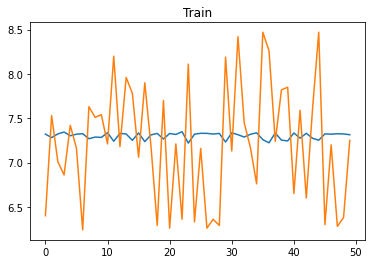

2/2 [==============================] - 2s 6ms/step


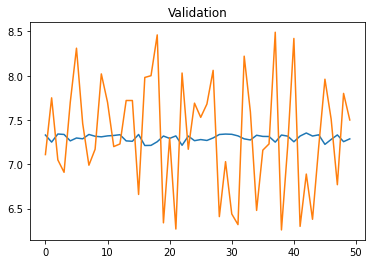

3/3 [==============================] - 1s 67ms/step


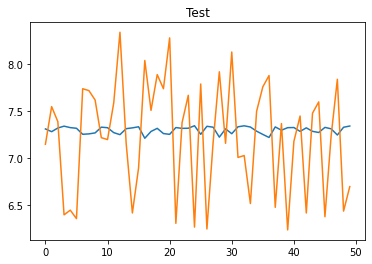

3/3 [==============================] - 0s 5ms/step


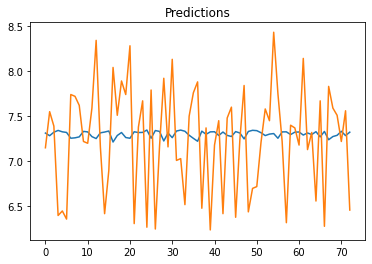

In [23]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [24]:
auto_gru_mse

0.36990943714903424

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 58.4645 - root_mean_squared_error: 7.6462

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 58s 7s/step - loss: 58.5492 - root_mean_squared_error: 7.6517 - val_loss: 56.4667 - val_root_mean_squared_error: 7.5144
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 57.5045 - root_mean_squared_error: 7.5832

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 57.4978 - root_mean_squared_error: 7.5827 - val_loss: 55.4198 - val_root_mean_squared_error: 7.4444
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 56.8178 - root_mean_squared_error: 7.5378

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 56.8268 - root_mean_squared_error: 7.5384 - val_loss: 54.7178 - val_root_mean_squared_error: 7.3971
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 56.0453 - root_mean_squared_error: 7.4863

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 56.0453 - root_mean_squared_error: 7.4863 - val_loss: 54.5494 - val_root_mean_squared_error: 7.3858
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 55.8285 - root_mean_squared_error: 7.4718

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 55.8285 - root_mean_squared_error: 7.4718 - val_loss: 54.3827 - val_root_mean_squared_error: 7.3745
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 55.1405 - root_mean_squared_error: 7.4257

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 55.1463 - root_mean_squared_error: 7.4261 - val_loss: 54.1657 - val_root_mean_squared_error: 7.3597
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 54.9096 - root_mean_squared_error: 7.4101

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.9096 - root_mean_squared_error: 7.4101 - val_loss: 53.6095 - val_root_mean_squared_error: 7.3219
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 54.3848 - root_mean_squared_error: 7.3746

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 54.2876 - root_mean_squared_error: 7.3680 - val_loss: 53.0204 - val_root_mean_squared_error: 7.2815
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 53.8761 - root_mean_squared_error: 7.3400

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 53.8761 - root_mean_squared_error: 7.3400 - val_loss: 52.3216 - val_root_mean_squared_error: 7.2334
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 53.0512 - root_mean_squared_error: 7.2836

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 53.0407 - root_mean_squared_error: 7.2829 - val_loss: 51.5559 - val_root_mean_squared_error: 7.1802
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 52.3348 - root_mean_squared_error: 7.2343

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 52.2922 - root_mean_squared_error: 7.2313 - val_loss: 50.7206 - val_root_mean_squared_error: 7.1218
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 51.0852 - root_mean_squared_error: 7.1474

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 51.0852 - root_mean_squared_error: 7.1474 - val_loss: 49.8812 - val_root_mean_squared_error: 7.0627
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 50.2664 - root_mean_squared_error: 7.0899

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 50.3049 - root_mean_squared_error: 7.0926 - val_loss: 49.0772 - val_root_mean_squared_error: 7.0055
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 49.6615 - root_mean_squared_error: 7.0471

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 49.6615 - root_mean_squared_error: 7.0471 - val_loss: 48.2714 - val_root_mean_squared_error: 6.9478
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 48.9934 - root_mean_squared_error: 6.9995

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 48.5049 - root_mean_squared_error: 6.9645 - val_loss: 47.4335 - val_root_mean_squared_error: 6.8872
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 47.8288 - root_mean_squared_error: 6.9158

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 47.7431 - root_mean_squared_error: 6.9096 - val_loss: 46.5998 - val_root_mean_squared_error: 6.8264
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 46.9622 - root_mean_squared_error: 6.8529

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 46.3937 - root_mean_squared_error: 6.8113 - val_loss: 45.6998 - val_root_mean_squared_error: 6.7602
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 45.0664 - root_mean_squared_error: 6.7132

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 45.0664 - root_mean_squared_error: 6.7132 - val_loss: 43.3872 - val_root_mean_squared_error: 6.5869
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 42.5127 - root_mean_squared_error: 6.5202

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 42.3601 - root_mean_squared_error: 6.5085 - val_loss: 39.3879 - val_root_mean_squared_error: 6.2760
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 39.1903 - root_mean_squared_error: 6.2602

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 39.0993 - root_mean_squared_error: 6.2529 - val_loss: 36.8062 - val_root_mean_squared_error: 6.0668
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 36.8969 - root_mean_squared_error: 6.0743

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 36.7187 - root_mean_squared_error: 6.0596 - val_loss: 34.1749 - val_root_mean_squared_error: 5.8459
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 33.8735 - root_mean_squared_error: 5.8201

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 33.7752 - root_mean_squared_error: 5.8116 - val_loss: 31.7185 - val_root_mean_squared_error: 5.6319
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 31.2507 - root_mean_squared_error: 5.5902

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 31.3014 - root_mean_squared_error: 5.5948 - val_loss: 29.3974 - val_root_mean_squared_error: 5.4219
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 29.5254 - root_mean_squared_error: 5.4337

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 29.3790 - root_mean_squared_error: 5.4202 - val_loss: 26.8478 - val_root_mean_squared_error: 5.1815
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 26.6837 - root_mean_squared_error: 5.1656

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 26.6389 - root_mean_squared_error: 5.1613 - val_loss: 24.4166 - val_root_mean_squared_error: 4.9413
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 24.9105 - root_mean_squared_error: 4.9910

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 24.8439 - root_mean_squared_error: 4.9844 - val_loss: 22.2383 - val_root_mean_squared_error: 4.7158
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 22.3199 - root_mean_squared_error: 4.7244

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 22.2393 - root_mean_squared_error: 4.7159 - val_loss: 20.2143 - val_root_mean_squared_error: 4.4960
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 20.2891 - root_mean_squared_error: 4.5043

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 20.2891 - root_mean_squared_error: 4.5043 - val_loss: 18.2416 - val_root_mean_squared_error: 4.2710
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 18.3209 - root_mean_squared_error: 4.2803

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 18.3209 - root_mean_squared_error: 4.2803 - val_loss: 16.4491 - val_root_mean_squared_error: 4.0558
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 16.5444 - root_mean_squared_error: 4.0675

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 16.5444 - root_mean_squared_error: 4.0675 - val_loss: 14.7976 - val_root_mean_squared_error: 3.8468
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 14.5832 - root_mean_squared_error: 3.8188

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 14.5832 - root_mean_squared_error: 3.8188 - val_loss: 13.2508 - val_root_mean_squared_error: 3.6402
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 13.5251 - root_mean_squared_error: 3.6777

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 13.5094 - root_mean_squared_error: 3.6755 - val_loss: 11.7208 - val_root_mean_squared_error: 3.4236
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 12.1843 - root_mean_squared_error: 3.4906

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 12.0296 - root_mean_squared_error: 3.4684 - val_loss: 10.3592 - val_root_mean_squared_error: 3.2186
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 10.6340 - root_mean_squared_error: 3.2610

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 10.5398 - root_mean_squared_error: 3.2465 - val_loss: 9.1461 - val_root_mean_squared_error: 3.0242
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 9.2566 - root_mean_squared_error: 3.0425

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 9.1049 - root_mean_squared_error: 3.0174 - val_loss: 8.0189 - val_root_mean_squared_error: 2.8318
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 8.3209 - root_mean_squared_error: 2.8846

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 8.3060 - root_mean_squared_error: 2.8820 - val_loss: 6.6332 - val_root_mean_squared_error: 2.5755
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 7.0868 - root_mean_squared_error: 2.6621

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 7.0001 - root_mean_squared_error: 2.6458 - val_loss: 5.3463 - val_root_mean_squared_error: 2.3122
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 5.4317 - root_mean_squared_error: 2.3306

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 5.4614 - root_mean_squared_error: 2.3370 - val_loss: 4.5830 - val_root_mean_squared_error: 2.1408
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 4.9917 - root_mean_squared_error: 2.2342

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 5.0226 - root_mean_squared_error: 2.2411 - val_loss: 3.9229 - val_root_mean_squared_error: 1.9806
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 4.3568 - root_mean_squared_error: 2.0873

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 4.4511 - root_mean_squared_error: 2.1098 - val_loss: 3.3464 - val_root_mean_squared_error: 1.8293
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 3.8814 - root_mean_squared_error: 1.9701

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 3.9318 - root_mean_squared_error: 1.9829 - val_loss: 2.8457 - val_root_mean_squared_error: 1.6869
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 3.1791 - root_mean_squared_error: 1.7830

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 3.2071 - root_mean_squared_error: 1.7908 - val_loss: 2.4010 - val_root_mean_squared_error: 1.5495
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 3.0049 - root_mean_squared_error: 1.7335

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2.8614 - root_mean_squared_error: 1.6916 - val_loss: 2.0242 - val_root_mean_squared_error: 1.4228
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2.3885 - root_mean_squared_error: 1.5455

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2.3983 - root_mean_squared_error: 1.5486 - val_loss: 1.7278 - val_root_mean_squared_error: 1.3145
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4608 - root_mean_squared_error: 1.5687

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2.4995 - root_mean_squared_error: 1.5810 - val_loss: 1.4671 - val_root_mean_squared_error: 1.2112
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2.1328 - root_mean_squared_error: 1.4604

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2.0774 - root_mean_squared_error: 1.4413 - val_loss: 1.2309 - val_root_mean_squared_error: 1.1094
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 1.7393 - root_mean_squared_error: 1.3188

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 1.7393 - root_mean_squared_error: 1.3188 - val_loss: 0.9809 - val_root_mean_squared_error: 0.9904
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 1.6214 - root_mean_squared_error: 1.2733

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1.6214 - root_mean_squared_error: 1.2733 - val_loss: 0.7989 - val_root_mean_squared_error: 0.8938
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4063 - root_mean_squared_error: 1.1859

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1.3140 - root_mean_squared_error: 1.1463 - val_loss: 0.6512 - val_root_mean_squared_error: 0.8070
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 0.9889 - root_mean_squared_error: 0.9944

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 4s 7ms/step


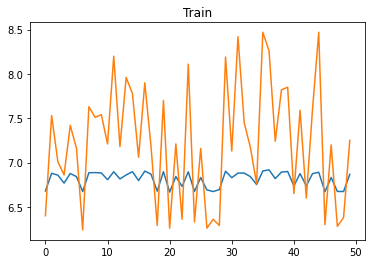

2/2 [==============================] - 3s 8ms/step


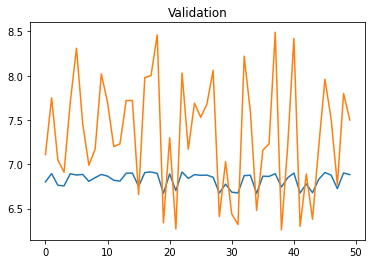

3/3 [==============================] - 0s 18ms/step


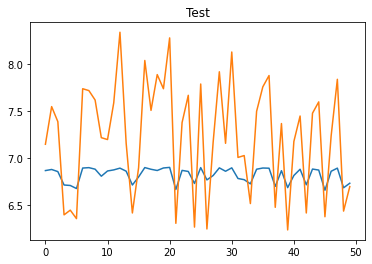

3/3 [==============================] - 0s 9ms/step


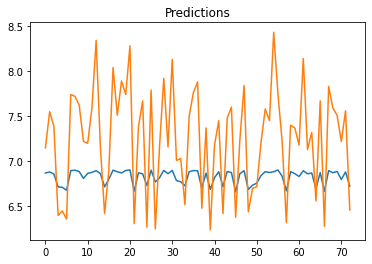

In [25]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [26]:
auto_lstm_mse

0.43668408629064087

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 42.4874 - root_mean_squared_error: 6.5182 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 2s/step - loss: 41.8277 - root_mean_squared_error: 6.4674 - val_loss: 36.0940 - val_root_mean_squared_error: 6.0078
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 36.4843 - root_mean_squared_error: 6.0402INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 36.4843 - root_mean_squared_error: 6.0402 - val_loss: 31.5642 - val_root_mean_squared_error: 5.6182
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 31.1668 - root_mean_squared_error: 5.5827INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 30.2194 - root_mean_squared_error: 5.4972 - val_loss: 27.4578 - val_root_mean_squared_error: 5.2400
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 27.2811 - root_mean_squared_error: 5.2231INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 24s 3s/step - loss: 27.3790 - root_mean_squared_error: 5.2325 - val_loss: 23.7886 - val_root_mean_squared_error: 4.8774
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 24.9977 - root_mean_squared_error: 4.9998INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 24.9977 - root_mean_squared_error: 4.9998 - val_loss: 20.3219 - val_root_mean_squared_error: 4.5080
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 22.2916 - root_mean_squared_error: 4.7214INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 21.6873 - root_mean_squared_error: 4.6570 - val_loss: 17.3552 - val_root_mean_squared_error: 4.1660
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 17.9222 - root_mean_squared_error: 4.2335INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 17.8174 - root_mean_squared_error: 4.2211 - val_loss: 15.0140 - val_root_mean_squared_error: 3.8748
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 15.2537 - root_mean_squared_error: 3.9056INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 15.2537 - root_mean_squared_error: 3.9056 - val_loss: 13.0108 - val_root_mean_squared_error: 3.6071
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 13.1005 - root_mean_squared_error: 3.6195INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 13.1005 - root_mean_squared_error: 3.6195 - val_loss: 11.3006 - val_root_mean_squared_error: 3.3616
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 11.6931 - root_mean_squared_error: 3.4195INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 11.8949 - root_mean_squared_error: 3.4489 - val_loss: 9.8163 - val_root_mean_squared_error: 3.1331
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 10.6702 - root_mean_squared_error: 3.2665INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 10.5696 - root_mean_squared_error: 3.2511 - val_loss: 8.5199 - val_root_mean_squared_error: 2.9189
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 9.4398 - root_mean_squared_error: 3.0724 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 9.4069 - root_mean_squared_error: 3.0671 - val_loss: 7.3850 - val_root_mean_squared_error: 2.7175
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 8.0784 - root_mean_squared_error: 2.8423INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 897ms/step - loss: 8.0892 - root_mean_squared_error: 2.8441 - val_loss: 6.3935 - val_root_mean_squared_error: 2.5285
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 6.8729 - root_mean_squared_error: 2.6216INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 7.0372 - root_mean_squared_error: 2.6528 - val_loss: 5.5292 - val_root_mean_squared_error: 2.3514
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 6.3035 - root_mean_squared_error: 2.5107INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 22s 3s/step - loss: 6.2271 - root_mean_squared_error: 2.4954 - val_loss: 4.7719 - val_root_mean_squared_error: 2.1845
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 5.4292 - root_mean_squared_error: 2.3301INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 5.4033 - root_mean_squared_error: 2.3245 - val_loss: 4.1086 - val_root_mean_squared_error: 2.0270
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 5.1676 - root_mean_squared_error: 2.2732INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 4.9800 - root_mean_squared_error: 2.2316 - val_loss: 3.5243 - val_root_mean_squared_error: 1.8773
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 4.2209 - root_mean_squared_error: 2.0545INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 4.2502 - root_mean_squared_error: 2.0616 - val_loss: 3.0321 - val_root_mean_squared_error: 1.7413
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 4.0205 - root_mean_squared_error: 2.0051INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 3.7290 - root_mean_squared_error: 1.9311 - val_loss: 2.5886 - val_root_mean_squared_error: 1.6089
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 3.3924 - root_mean_squared_error: 1.8419INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 3.2022 - root_mean_squared_error: 1.7895 - val_loss: 2.2076 - val_root_mean_squared_error: 1.4858
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 3.1601 - root_mean_squared_error: 1.7777INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 915ms/step - loss: 3.0847 - root_mean_squared_error: 1.7563 - val_loss: 1.8858 - val_root_mean_squared_error: 1.3732
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2.6571 - root_mean_squared_error: 1.6301INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2.6854 - root_mean_squared_error: 1.6387 - val_loss: 1.6065 - val_root_mean_squared_error: 1.2675
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2.3034 - root_mean_squared_error: 1.5177INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2.2395 - root_mean_squared_error: 1.4965 - val_loss: 1.3760 - val_root_mean_squared_error: 1.1730
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2.1738 - root_mean_squared_error: 1.4744INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.1738 - root_mean_squared_error: 1.4744 - val_loss: 1.1806 - val_root_mean_squared_error: 1.0866
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2.0594 - root_mean_squared_error: 1.4351INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.0760 - root_mean_squared_error: 1.4408 - val_loss: 1.0147 - val_root_mean_squared_error: 1.0073
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7930 - root_mean_squared_error: 1.3390INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.8327 - root_mean_squared_error: 1.3538 - val_loss: 0.8765 - val_root_mean_squared_error: 0.9362
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2.1101 - root_mean_squared_error: 1.4526INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2.0700 - root_mean_squared_error: 1.4387 - val_loss: 0.7610 - val_root_mean_squared_error: 0.8724
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6880 - root_mean_squared_error: 1.2992INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.7046 - root_mean_squared_error: 1.3056 - val_loss: 0.6673 - val_root_mean_squared_error: 0.8169
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 1.5044 - root_mean_squared_error: 1.2265INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.4264 - root_mean_squared_error: 1.1943 - val_loss: 0.5932 - val_root_mean_squared_error: 0.7702
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 1.4618 - root_mean_squared_error: 1.2090INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.4884 - root_mean_squared_error: 1.2200 - val_loss: 0.5320 - val_root_mean_squared_error: 0.7294
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6323 - root_mean_squared_error: 1.2776INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.6065 - root_mean_squared_error: 1.2675 - val_loss: 0.4865 - val_root_mean_squared_error: 0.6975
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 1.4198 - root_mean_squared_error: 1.1916INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.4198 - root_mean_squared_error: 1.1916 - val_loss: 0.4519 - val_root_mean_squared_error: 0.6723
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3490 - root_mean_squared_error: 1.1615INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.2844 - root_mean_squared_error: 1.1333 - val_loss: 0.4238 - val_root_mean_squared_error: 0.6510
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 1.3510 - root_mean_squared_error: 1.1623INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3510 - root_mean_squared_error: 1.1623 - val_loss: 0.4031 - val_root_mean_squared_error: 0.6349
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1511 - root_mean_squared_error: 1.0729INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.2488 - root_mean_squared_error: 1.1175 - val_loss: 0.3887 - val_root_mean_squared_error: 0.6234
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.1961 - root_mean_squared_error: 1.0937INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 935ms/step - loss: 1.1961 - root_mean_squared_error: 1.0937 - val_loss: 0.3752 - val_root_mean_squared_error: 0.6125
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 1.4231 - root_mean_squared_error: 1.1929INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.4476 - root_mean_squared_error: 1.2032 - val_loss: 0.3657 - val_root_mean_squared_error: 0.6048
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2297 - root_mean_squared_error: 1.1089INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.2051 - root_mean_squared_error: 1.0978 - val_loss: 0.3578 - val_root_mean_squared_error: 0.5982
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1914 - root_mean_squared_error: 1.0915INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 1.1661 - root_mean_squared_error: 1.0798 - val_loss: 0.3528 - val_root_mean_squared_error: 0.5940
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 1.2217 - root_mean_squared_error: 1.1053INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.2217 - root_mean_squared_error: 1.1053 - val_loss: 0.3493 - val_root_mean_squared_error: 0.5910
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2482 - root_mean_squared_error: 1.1172INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 1.2426 - root_mean_squared_error: 1.1147 - val_loss: 0.3452 - val_root_mean_squared_error: 0.5876
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1009 - root_mean_squared_error: 1.0492INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.1151 - root_mean_squared_error: 1.0560 - val_loss: 0.3418 - val_root_mean_squared_error: 0.5846
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 1.3788 - root_mean_squared_error: 1.1742INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.3667 - root_mean_squared_error: 1.1690 - val_loss: 0.3399 - val_root_mean_squared_error: 0.5830
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 1.2398 - root_mean_squared_error: 1.1135INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 997ms/step - loss: 1.2398 - root_mean_squared_error: 1.1135 - val_loss: 0.3381 - val_root_mean_squared_error: 0.5815
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 1.2453 - root_mean_squared_error: 1.1159INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.3002 - root_mean_squared_error: 1.1403 - val_loss: 0.3368 - val_root_mean_squared_error: 0.5804
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 1.0550 - root_mean_squared_error: 1.0271INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.1160 - root_mean_squared_error: 1.0564 - val_loss: 0.3345 - val_root_mean_squared_error: 0.5784
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3063 - root_mean_squared_error: 1.1429INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.2740 - root_mean_squared_error: 1.1287 - val_loss: 0.3321 - val_root_mean_squared_error: 0.5763
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1263 - root_mean_squared_error: 1.0613INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.1254 - root_mean_squared_error: 1.0609 - val_loss: 0.3302 - val_root_mean_squared_error: 0.5747
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 1.2220 - root_mean_squared_error: 1.1054INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.1854 - root_mean_squared_error: 1.0888 - val_loss: 0.3290 - val_root_mean_squared_error: 0.5736
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2604 - root_mean_squared_error: 1.1227INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 6ms/step


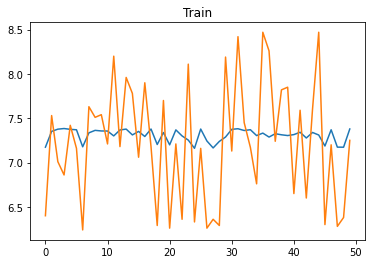

2/2 [==============================] - 1s 5ms/step


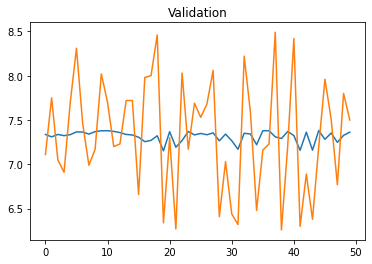

3/3 [==============================] - 0s 62ms/step


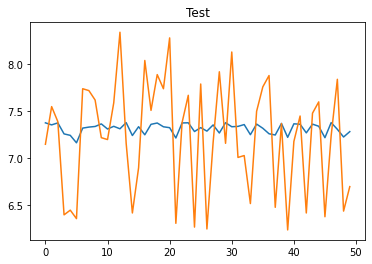

3/3 [==============================] - 0s 6ms/step


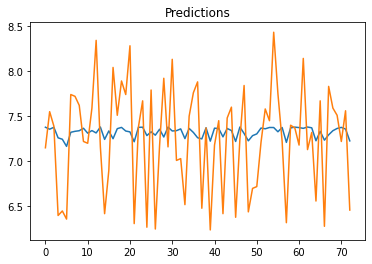

In [27]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [28]:
auto_rnn_mse

0.30654309243581107

# Moving Average with Encoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 25521.3926 - root_mean_squared_error: 159.7542 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 11s 1s/step - loss: 24266.2031 - root_mean_squared_error: 155.7761 - val_loss: 1179.6154 - val_root_mean_squared_error: 34.3455
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 12442.2881 - root_mean_squared_error: 111.5450

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 11760.6465 - root_mean_squared_error: 108.4465 - val_loss: 14.0561 - val_root_mean_squared_error: 3.7491
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 6010.5918 - root_mean_squared_error: 77.5280 - val_loss: 125.0094 - val_root_mean_squared_error: 11.1808
Epoch 4/50
8/8 [==============================] - 0s 47ms/step - loss: 5237.5835 - root_mean_squared_error: 72.3712 - val_loss: 41.9705 - val_root_mean_squared_error: 6.4785
Epoch 5/50
8/8 [==============================] - 0s 59ms/step - loss: 4073.6672 - root_mean_squared_error: 63.8253 - val_loss: 27.0242 - val_root_mean_squared_error: 5.1985
Epoch 6/50
8/8 [==============================] - 0s 49ms/step - loss: 2627.7646 - root_mean_squared_error: 51.2617 - val_loss: 54.1976 - val_root_mean_squared_error: 7.3619
Epoch 7/50
8/8 [==============================] - 0s 34ms/step - loss: 2253.8604 - root_mean_squared_error: 47.4748 - val_loss: 54.1996 - v

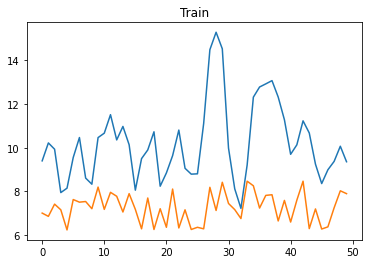

2/2 [==============================] - 0s 17ms/step


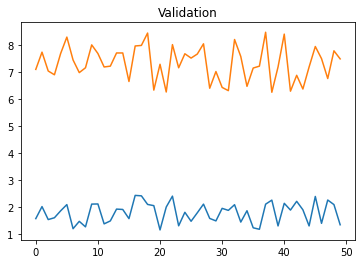

3/3 [==============================] - 1s 239ms/step


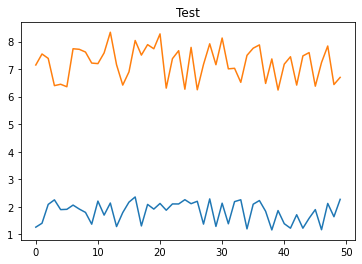

3/3 [==============================] - 0s 3ms/step


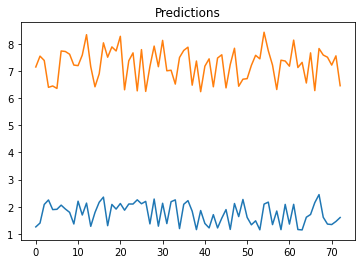

In [29]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [30]:
mavg_auto_cnn_mse

30.594964252500468

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 63.4790 - root_mean_squared_error: 7.9674INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 29s 2s/step - loss: 63.3613 - root_mean_squared_error: 7.9600 - val_loss: 58.3569 - val_root_mean_squared_error: 7.6392
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 57.4185 - root_mean_squared_error: 7.5775INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 57.3772 - root_mean_squared_error: 7.5748 - val_loss: 53.8834 - val_root_mean_squared_error: 7.3405
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 54.0148 - root_mean_squared_error: 7.3495INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 53.9818 - root_mean_squared_error: 7.3472 - val_loss: 49.6612 - val_root_mean_squared_error: 7.0471
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 47.7636 - root_mean_squared_error: 6.9111INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 47.8688 - root_mean_squared_error: 6.9187 - val_loss: 45.6743 - val_root_mean_squared_error: 6.7583
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 45.7543 - root_mean_squared_error: 6.7642INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 45.6576 - root_mean_squared_error: 6.7570 - val_loss: 41.8730 - val_root_mean_squared_error: 6.4709
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 41.8697 - root_mean_squared_error: 6.4707INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 41.8697 - root_mean_squared_error: 6.4707 - val_loss: 38.2084 - val_root_mean_squared_error: 6.1813
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 36.5698 - root_mean_squared_error: 6.0473INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 36.6610 - root_mean_squared_error: 6.0548 - val_loss: 34.3208 - val_root_mean_squared_error: 5.8584
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 33.8986 - root_mean_squared_error: 5.8222INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 33.8986 - root_mean_squared_error: 5.8222 - val_loss: 30.9848 - val_root_mean_squared_error: 5.5664
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 31.6809 - root_mean_squared_error: 5.6286INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 31.6667 - root_mean_squared_error: 5.6273 - val_loss: 28.0025 - val_root_mean_squared_error: 5.2917
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 27.7270 - root_mean_squared_error: 5.2656INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 27.6377 - root_mean_squared_error: 5.2572 - val_loss: 25.2649 - val_root_mean_squared_error: 5.0264
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 25.3045 - root_mean_squared_error: 5.0304INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 25.3045 - root_mean_squared_error: 5.0304 - val_loss: 22.7089 - val_root_mean_squared_error: 4.7654
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 22.5370 - root_mean_squared_error: 4.7473INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 22.4590 - root_mean_squared_error: 4.7391 - val_loss: 20.3655 - val_root_mean_squared_error: 4.5128
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 19.7333 - root_mean_squared_error: 4.4422INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 19.4929 - root_mean_squared_error: 4.4151 - val_loss: 18.2660 - val_root_mean_squared_error: 4.2739
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 18.2908 - root_mean_squared_error: 4.2768INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 17.8077 - root_mean_squared_error: 4.2199 - val_loss: 16.3549 - val_root_mean_squared_error: 4.0441
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 16.3634 - root_mean_squared_error: 4.0452INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 16.4620 - root_mean_squared_error: 4.0573 - val_loss: 14.6032 - val_root_mean_squared_error: 3.8214
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 14.7087 - root_mean_squared_error: 3.8352INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 14.7004 - root_mean_squared_error: 3.8341 - val_loss: 13.0060 - val_root_mean_squared_error: 3.6064
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 13.0901 - root_mean_squared_error: 3.6180INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 12.8144 - root_mean_squared_error: 3.5797 - val_loss: 11.5536 - val_root_mean_squared_error: 3.3991
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 11.3105 - root_mean_squared_error: 3.3631INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 11.3105 - root_mean_squared_error: 3.3631 - val_loss: 10.2441 - val_root_mean_squared_error: 3.2006
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 11.2635 - root_mean_squared_error: 3.3561INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 10.8462 - root_mean_squared_error: 3.2934 - val_loss: 9.0479 - val_root_mean_squared_error: 3.0080
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 9.7879 - root_mean_squared_error: 3.1286INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 9.7879 - root_mean_squared_error: 3.1286 - val_loss: 7.9855 - val_root_mean_squared_error: 2.8259
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 8.3190 - root_mean_squared_error: 2.8843INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 8.2560 - root_mean_squared_error: 2.8733 - val_loss: 7.0260 - val_root_mean_squared_error: 2.6507
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 6.8828 - root_mean_squared_error: 2.6235INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 6.8585 - root_mean_squared_error: 2.6189 - val_loss: 6.1997 - val_root_mean_squared_error: 2.4899
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 6.3871 - root_mean_squared_error: 2.5273INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 6.3871 - root_mean_squared_error: 2.5273 - val_loss: 5.4695 - val_root_mean_squared_error: 2.3387
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 6.2326 - root_mean_squared_error: 2.4965INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.2326 - root_mean_squared_error: 2.4965 - val_loss: 4.8235 - val_root_mean_squared_error: 2.1962
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 5.1027 - root_mean_squared_error: 2.2589INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 5.1256 - root_mean_squared_error: 2.2640 - val_loss: 4.2535 - val_root_mean_squared_error: 2.0624
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 4.7954 - root_mean_squared_error: 2.1898INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 4.7954 - root_mean_squared_error: 2.1898 - val_loss: 3.7426 - val_root_mean_squared_error: 1.9346
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 4.5779 - root_mean_squared_error: 2.1396INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 4.3619 - root_mean_squared_error: 2.0885 - val_loss: 3.2889 - val_root_mean_squared_error: 1.8135
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 3.8348 - root_mean_squared_error: 1.9583INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.8767 - root_mean_squared_error: 1.9689 - val_loss: 2.8833 - val_root_mean_squared_error: 1.6980
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 3.3992 - root_mean_squared_error: 1.8437INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.3472 - root_mean_squared_error: 1.8295 - val_loss: 2.5384 - val_root_mean_squared_error: 1.5932
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 3.2387 - root_mean_squared_error: 1.7997INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 2s/step - loss: 3.2779 - root_mean_squared_error: 1.8105 - val_loss: 2.2435 - val_root_mean_squared_error: 1.4978
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 2.6955 - root_mean_squared_error: 1.6418INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2.8207 - root_mean_squared_error: 1.6795 - val_loss: 1.9859 - val_root_mean_squared_error: 1.4092
Epoch 32/50
4/8 [==============>...............] - ETA: 0s - loss: 2.8218 - root_mean_squared_error: 1.6798INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2.6360 - root_mean_squared_error: 1.6236 - val_loss: 1.7603 - val_root_mean_squared_error: 1.3268
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5384 - root_mean_squared_error: 1.5932INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.3716 - root_mean_squared_error: 1.5400 - val_loss: 1.5619 - val_root_mean_squared_error: 1.2498
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2.3490 - root_mean_squared_error: 1.5326INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.2715 - root_mean_squared_error: 1.5071 - val_loss: 1.3894 - val_root_mean_squared_error: 1.1787
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 1.9445 - root_mean_squared_error: 1.3945INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.9794 - root_mean_squared_error: 1.4069 - val_loss: 1.2399 - val_root_mean_squared_error: 1.1135
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2.0933 - root_mean_squared_error: 1.4468INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 2.1128 - root_mean_squared_error: 1.4536 - val_loss: 1.1086 - val_root_mean_squared_error: 1.0529
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7036 - root_mean_squared_error: 1.3052INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.6780 - root_mean_squared_error: 1.2954 - val_loss: 0.9960 - val_root_mean_squared_error: 0.9980
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 1.8317 - root_mean_squared_error: 1.3534INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.8956 - root_mean_squared_error: 1.3768 - val_loss: 0.9022 - val_root_mean_squared_error: 0.9498
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2.1263 - root_mean_squared_error: 1.4582INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 1.9579 - root_mean_squared_error: 1.3992 - val_loss: 0.8170 - val_root_mean_squared_error: 0.9039
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 1.7444 - root_mean_squared_error: 1.3208INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.7444 - root_mean_squared_error: 1.3208 - val_loss: 0.7403 - val_root_mean_squared_error: 0.8604
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8808 - root_mean_squared_error: 1.3714INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 1.9450 - root_mean_squared_error: 1.3946 - val_loss: 0.6708 - val_root_mean_squared_error: 0.8190
Epoch 42/50
4/8 [==============>...............] - ETA: 0s - loss: 1.6279 - root_mean_squared_error: 1.2759INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.5273 - root_mean_squared_error: 1.2359 - val_loss: 0.6131 - val_root_mean_squared_error: 0.7830
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3488 - root_mean_squared_error: 1.1614INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 22s 3s/step - loss: 1.3362 - root_mean_squared_error: 1.1560 - val_loss: 0.5658 - val_root_mean_squared_error: 0.7522
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 1.5110 - root_mean_squared_error: 1.2292INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.4302 - root_mean_squared_error: 1.1959 - val_loss: 0.5264 - val_root_mean_squared_error: 0.7255
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3073 - root_mean_squared_error: 1.1434INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3060 - root_mean_squared_error: 1.1428 - val_loss: 0.4911 - val_root_mean_squared_error: 0.7008
Epoch 46/50
4/8 [==============>...............] - ETA: 0s - loss: 1.0944 - root_mean_squared_error: 1.0462INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.2827 - root_mean_squared_error: 1.1326 - val_loss: 0.4606 - val_root_mean_squared_error: 0.6787
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3695 - root_mean_squared_error: 1.1702INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 24s 3s/step - loss: 1.4054 - root_mean_squared_error: 1.1855 - val_loss: 0.4331 - val_root_mean_squared_error: 0.6581
Epoch 48/50
4/8 [==============>...............] - ETA: 0s - loss: 1.2161 - root_mean_squared_error: 1.1027INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.1659 - root_mean_squared_error: 1.0798 - val_loss: 0.4090 - val_root_mean_squared_error: 0.6395
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3629 - root_mean_squared_error: 1.1675INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.3544 - root_mean_squared_error: 1.1638 - val_loss: 0.3876 - val_root_mean_squared_error: 0.6226
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4335 - root_mean_squared_error: 1.1973INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 8ms/step


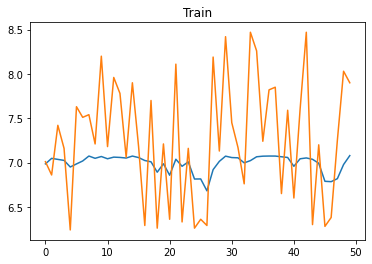

2/2 [==============================] - 1s 6ms/step


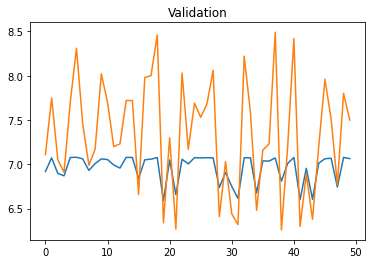

3/3 [==============================] - 0s 18ms/step


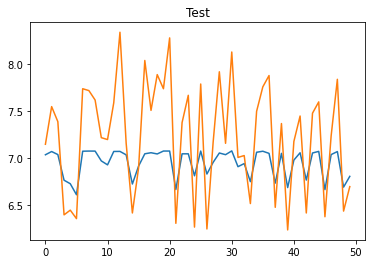

3/3 [==============================] - 0s 68ms/step


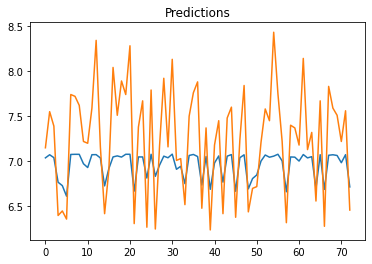

In [31]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [32]:
mavg_auto_rnn_mse

0.2890930473738888

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 67.7366 - root_mean_squared_error: 8.2302

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 55s 6s/step - loss: 67.7366 - root_mean_squared_error: 8.2302 - val_loss: 63.8497 - val_root_mean_squared_error: 7.9906
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 63.7046 - root_mean_squared_error: 7.9815

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 63.7046 - root_mean_squared_error: 7.9815 - val_loss: 60.4624 - val_root_mean_squared_error: 7.7758
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 60.5665 - root_mean_squared_error: 7.7824

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 60.3220 - root_mean_squared_error: 7.7667 - val_loss: 57.1998 - val_root_mean_squared_error: 7.5631
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 56.9106 - root_mean_squared_error: 7.5439

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 56.6571 - root_mean_squared_error: 7.5271 - val_loss: 54.0278 - val_root_mean_squared_error: 7.3504
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 54.6686 - root_mean_squared_error: 7.3938

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 54.5208 - root_mean_squared_error: 7.3838 - val_loss: 50.9521 - val_root_mean_squared_error: 7.1381
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 50.2396 - root_mean_squared_error: 7.0880

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 50.5380 - root_mean_squared_error: 7.1090 - val_loss: 47.9518 - val_root_mean_squared_error: 6.9247
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 47.7739 - root_mean_squared_error: 6.9119

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 47.7739 - root_mean_squared_error: 6.9119 - val_loss: 44.9799 - val_root_mean_squared_error: 6.7067
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 44.6840 - root_mean_squared_error: 6.6846

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 44.6134 - root_mean_squared_error: 6.6793 - val_loss: 41.9189 - val_root_mean_squared_error: 6.4745
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 41.4438 - root_mean_squared_error: 6.4377

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 41.3520 - root_mean_squared_error: 6.4306 - val_loss: 38.7923 - val_root_mean_squared_error: 6.2283
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 38.2597 - root_mean_squared_error: 6.1854

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 38.3284 - root_mean_squared_error: 6.1910 - val_loss: 35.9408 - val_root_mean_squared_error: 5.9951
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 35.8156 - root_mean_squared_error: 5.9846

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 35.8156 - root_mean_squared_error: 5.9846 - val_loss: 33.2263 - val_root_mean_squared_error: 5.7642
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 33.3380 - root_mean_squared_error: 5.7739

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 33.1960 - root_mean_squared_error: 5.7616 - val_loss: 30.5907 - val_root_mean_squared_error: 5.5309
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 30.5045 - root_mean_squared_error: 5.5231

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 30.5045 - root_mean_squared_error: 5.5231 - val_loss: 28.0192 - val_root_mean_squared_error: 5.2933
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 27.8427 - root_mean_squared_error: 5.2766

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 27.7266 - root_mean_squared_error: 5.2656 - val_loss: 25.5299 - val_root_mean_squared_error: 5.0527
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 25.5099 - root_mean_squared_error: 5.0507

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 25.5145 - root_mean_squared_error: 5.0512 - val_loss: 23.1324 - val_root_mean_squared_error: 4.8096
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 22.6129 - root_mean_squared_error: 4.7553

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 22.6129 - root_mean_squared_error: 4.7553 - val_loss: 20.8537 - val_root_mean_squared_error: 4.5666
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 20.3654 - root_mean_squared_error: 4.5128

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 20.4112 - root_mean_squared_error: 4.5179 - val_loss: 18.6798 - val_root_mean_squared_error: 4.3220
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 18.8983 - root_mean_squared_error: 4.3472

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 18.7932 - root_mean_squared_error: 4.3351 - val_loss: 16.5334 - val_root_mean_squared_error: 4.0661
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 16.2908 - root_mean_squared_error: 4.0362

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 16.2908 - root_mean_squared_error: 4.0362 - val_loss: 14.5420 - val_root_mean_squared_error: 3.8134
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 14.4167 - root_mean_squared_error: 3.7969

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 14.3235 - root_mean_squared_error: 3.7846 - val_loss: 12.7992 - val_root_mean_squared_error: 3.5776
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 12.1894 - root_mean_squared_error: 3.4913

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 12.1894 - root_mean_squared_error: 3.4913 - val_loss: 11.2323 - val_root_mean_squared_error: 3.3515
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 10.9148 - root_mean_squared_error: 3.3038

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 10.9148 - root_mean_squared_error: 3.3038 - val_loss: 9.8200 - val_root_mean_squared_error: 3.1337
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 9.9089 - root_mean_squared_error: 3.1478 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 9.5299 - root_mean_squared_error: 3.0871 - val_loss: 8.5447 - val_root_mean_squared_error: 2.9231
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 8.5695 - root_mean_squared_error: 2.9274

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 8.7908 - root_mean_squared_error: 2.9649 - val_loss: 7.4172 - val_root_mean_squared_error: 2.7234
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 7.6519 - root_mean_squared_error: 2.7662

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 7.6519 - root_mean_squared_error: 2.7662 - val_loss: 6.3894 - val_root_mean_squared_error: 2.5277
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 6.7111 - root_mean_squared_error: 2.5906

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 6.7155 - root_mean_squared_error: 2.5914 - val_loss: 5.4866 - val_root_mean_squared_error: 2.3424
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 5.7011 - root_mean_squared_error: 2.3877

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 5.7011 - root_mean_squared_error: 2.3877 - val_loss: 4.7024 - val_root_mean_squared_error: 2.1685
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 4.7967 - root_mean_squared_error: 2.1901

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 4.8394 - root_mean_squared_error: 2.1999 - val_loss: 4.0268 - val_root_mean_squared_error: 2.0067
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 4.2462 - root_mean_squared_error: 2.0606

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 4.2635 - root_mean_squared_error: 2.0648 - val_loss: 3.4357 - val_root_mean_squared_error: 1.8536
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 3.6689 - root_mean_squared_error: 1.9154

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 3.6470 - root_mean_squared_error: 1.9097 - val_loss: 2.9284 - val_root_mean_squared_error: 1.7113
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2.9891 - root_mean_squared_error: 1.7289

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2.9891 - root_mean_squared_error: 1.7289 - val_loss: 2.5039 - val_root_mean_squared_error: 1.5824
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2.5144 - root_mean_squared_error: 1.5857

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2.5626 - root_mean_squared_error: 1.6008 - val_loss: 2.1465 - val_root_mean_squared_error: 1.4651
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5427 - root_mean_squared_error: 1.5946

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2.4381 - root_mean_squared_error: 1.5614 - val_loss: 1.8358 - val_root_mean_squared_error: 1.3549
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 1.9758 - root_mean_squared_error: 1.4056

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.9758 - root_mean_squared_error: 1.4056 - val_loss: 1.5822 - val_root_mean_squared_error: 1.2579
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6859 - root_mean_squared_error: 1.2984

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1.6884 - root_mean_squared_error: 1.2994 - val_loss: 1.3654 - val_root_mean_squared_error: 1.1685
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.7032 - root_mean_squared_error: 1.3051

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.7032 - root_mean_squared_error: 1.3051 - val_loss: 1.1849 - val_root_mean_squared_error: 1.0885
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 1.4949 - root_mean_squared_error: 1.2227

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 1.4949 - root_mean_squared_error: 1.2227 - val_loss: 1.0350 - val_root_mean_squared_error: 1.0173
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2838 - root_mean_squared_error: 1.1331

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 1.2920 - root_mean_squared_error: 1.1367 - val_loss: 0.9130 - val_root_mean_squared_error: 0.9555
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2393 - root_mean_squared_error: 1.1132

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 4s/step - loss: 1.2212 - root_mean_squared_error: 1.1051 - val_loss: 0.8110 - val_root_mean_squared_error: 0.9006
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1818 - root_mean_squared_error: 1.0871

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 1.1394 - root_mean_squared_error: 1.0674 - val_loss: 0.7312 - val_root_mean_squared_error: 0.8551
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0006 - root_mean_squared_error: 1.0003

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.0229 - root_mean_squared_error: 1.0114 - val_loss: 0.6649 - val_root_mean_squared_error: 0.8154
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 0.9336 - root_mean_squared_error: 0.9662

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 0.9336 - root_mean_squared_error: 0.9662 - val_loss: 0.6089 - val_root_mean_squared_error: 0.7803
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0834 - root_mean_squared_error: 1.0409

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1.0691 - root_mean_squared_error: 1.0340 - val_loss: 0.5601 - val_root_mean_squared_error: 0.7484
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9009 - root_mean_squared_error: 0.9492

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 0.8889 - root_mean_squared_error: 0.9428 - val_loss: 0.5204 - val_root_mean_squared_error: 0.7214
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 0.8455 - root_mean_squared_error: 0.9195

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.8455 - root_mean_squared_error: 0.9195 - val_loss: 0.4883 - val_root_mean_squared_error: 0.6988
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.8442 - root_mean_squared_error: 0.9188

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.8442 - root_mean_squared_error: 0.9188 - val_loss: 0.4641 - val_root_mean_squared_error: 0.6813
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7811 - root_mean_squared_error: 0.8838

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 0.7728 - root_mean_squared_error: 0.8791 - val_loss: 0.4453 - val_root_mean_squared_error: 0.6673
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8121 - root_mean_squared_error: 0.9012

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 0.8039 - root_mean_squared_error: 0.8966 - val_loss: 0.4302 - val_root_mean_squared_error: 0.6559
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.7218 - root_mean_squared_error: 0.8496

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.7218 - root_mean_squared_error: 0.8496 - val_loss: 0.4189 - val_root_mean_squared_error: 0.6472
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.6452 - root_mean_squared_error: 0.8032

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 6s 44ms/step


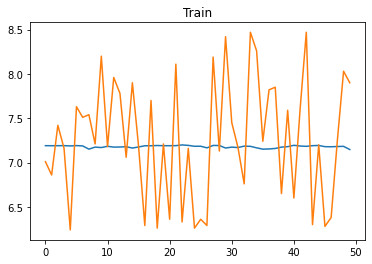

2/2 [==============================] - 3s 13ms/step


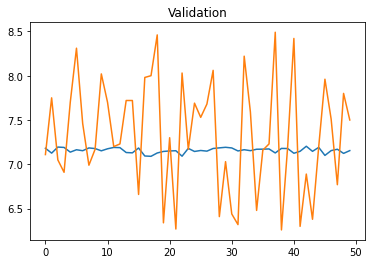

3/3 [==============================] - 0s 10ms/step


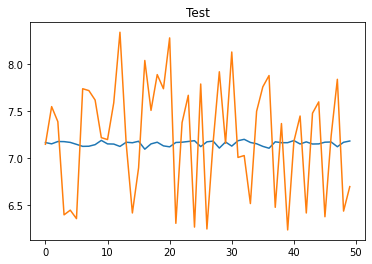

3/3 [==============================] - 0s 6ms/step


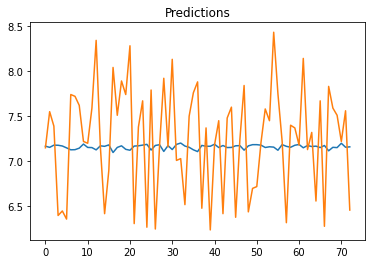

In [33]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
mavg_auto_gru_mse

0.36101791890277507

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 61.2403 - root_mean_squared_error: 7.8256

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 61s 5s/step - loss: 61.2457 - root_mean_squared_error: 7.8260 - val_loss: 59.3291 - val_root_mean_squared_error: 7.7025
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 60.0333 - root_mean_squared_error: 7.7481

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 59.5055 - root_mean_squared_error: 7.7140 - val_loss: 57.7594 - val_root_mean_squared_error: 7.6000
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 58.3905 - root_mean_squared_error: 7.6414

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 58.3905 - root_mean_squared_error: 7.6414 - val_loss: 56.2219 - val_root_mean_squared_error: 7.4981
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 56.8137 - root_mean_squared_error: 7.5375

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 56.8137 - root_mean_squared_error: 7.5375 - val_loss: 54.6782 - val_root_mean_squared_error: 7.3945
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 54.3189 - root_mean_squared_error: 7.3701

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 54.7411 - root_mean_squared_error: 7.3987 - val_loss: 53.0709 - val_root_mean_squared_error: 7.2850
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 53.2105 - root_mean_squared_error: 7.2946

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 53.2105 - root_mean_squared_error: 7.2946 - val_loss: 51.6460 - val_root_mean_squared_error: 7.1865
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 51.8426 - root_mean_squared_error: 7.2002

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 51.8426 - root_mean_squared_error: 7.2002 - val_loss: 50.3078 - val_root_mean_squared_error: 7.0928
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 50.4346 - root_mean_squared_error: 7.1017

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 50.3874 - root_mean_squared_error: 7.0984 - val_loss: 48.9347 - val_root_mean_squared_error: 6.9953
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 49.6067 - root_mean_squared_error: 7.0432

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 49.3662 - root_mean_squared_error: 7.0261 - val_loss: 47.5541 - val_root_mean_squared_error: 6.8959
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 47.9372 - root_mean_squared_error: 6.9237

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 47.9876 - root_mean_squared_error: 6.9273 - val_loss: 46.2002 - val_root_mean_squared_error: 6.7971
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 46.5709 - root_mean_squared_error: 6.8243

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 46.4774 - root_mean_squared_error: 6.8174 - val_loss: 44.8383 - val_root_mean_squared_error: 6.6961
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 45.2328 - root_mean_squared_error: 6.7255

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 45.2509 - root_mean_squared_error: 6.7269 - val_loss: 43.4515 - val_root_mean_squared_error: 6.5918
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 43.3041 - root_mean_squared_error: 6.5806

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 43.4527 - root_mean_squared_error: 6.5919 - val_loss: 42.0074 - val_root_mean_squared_error: 6.4813
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 42.2918 - root_mean_squared_error: 6.5032

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 42.2259 - root_mean_squared_error: 6.4981 - val_loss: 40.4149 - val_root_mean_squared_error: 6.3573
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 40.5220 - root_mean_squared_error: 6.3657

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 40.3370 - root_mean_squared_error: 6.3511 - val_loss: 38.4966 - val_root_mean_squared_error: 6.2046
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 38.1187 - root_mean_squared_error: 6.1740

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 38.2686 - root_mean_squared_error: 6.1862 - val_loss: 36.5497 - val_root_mean_squared_error: 6.0456
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 36.6737 - root_mean_squared_error: 6.0559

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 36.4579 - root_mean_squared_error: 6.0380 - val_loss: 34.8662 - val_root_mean_squared_error: 5.9048
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 34.9126 - root_mean_squared_error: 5.9087

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 34.8745 - root_mean_squared_error: 5.9055 - val_loss: 33.1156 - val_root_mean_squared_error: 5.7546
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 33.1278 - root_mean_squared_error: 5.7557

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 33.0521 - root_mean_squared_error: 5.7491 - val_loss: 31.3894 - val_root_mean_squared_error: 5.6026
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 30.8695 - root_mean_squared_error: 5.5560

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 30.8695 - root_mean_squared_error: 5.5560 - val_loss: 29.5420 - val_root_mean_squared_error: 5.4353
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 30.0209 - root_mean_squared_error: 5.4791

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 30.0209 - root_mean_squared_error: 5.4791 - val_loss: 27.7174 - val_root_mean_squared_error: 5.2647
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 27.6611 - root_mean_squared_error: 5.2594

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 27.6611 - root_mean_squared_error: 5.2594 - val_loss: 26.0246 - val_root_mean_squared_error: 5.1014
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 26.1511 - root_mean_squared_error: 5.1138

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 26.0626 - root_mean_squared_error: 5.1052 - val_loss: 24.3572 - val_root_mean_squared_error: 4.9353
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 24.5637 - root_mean_squared_error: 4.9562

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 24.5637 - root_mean_squared_error: 4.9562 - val_loss: 22.7215 - val_root_mean_squared_error: 4.7667
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 22.4971 - root_mean_squared_error: 4.7431

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 22.5072 - root_mean_squared_error: 4.7442 - val_loss: 21.1162 - val_root_mean_squared_error: 4.5952
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 21.2359 - root_mean_squared_error: 4.6082

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 21.2359 - root_mean_squared_error: 4.6082 - val_loss: 19.5494 - val_root_mean_squared_error: 4.4215
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 19.8477 - root_mean_squared_error: 4.4551

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 19.6425 - root_mean_squared_error: 4.4320 - val_loss: 18.0171 - val_root_mean_squared_error: 4.2447
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 18.2645 - root_mean_squared_error: 4.2737

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 18.1795 - root_mean_squared_error: 4.2637 - val_loss: 16.3087 - val_root_mean_squared_error: 4.0384
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 16.0049 - root_mean_squared_error: 4.0006

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 15.9352 - root_mean_squared_error: 3.9919 - val_loss: 14.5648 - val_root_mean_squared_error: 3.8164
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 14.8537 - root_mean_squared_error: 3.8541

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 14.8082 - root_mean_squared_error: 3.8481 - val_loss: 13.2518 - val_root_mean_squared_error: 3.6403
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 13.2815 - root_mean_squared_error: 3.6444

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 13.0993 - root_mean_squared_error: 3.6193 - val_loss: 12.0396 - val_root_mean_squared_error: 3.4698
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 12.1243 - root_mean_squared_error: 3.4820

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 12.1243 - root_mean_squared_error: 3.4820 - val_loss: 10.9078 - val_root_mean_squared_error: 3.3027
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 10.9385 - root_mean_squared_error: 3.3073

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 10.9385 - root_mean_squared_error: 3.3073 - val_loss: 9.8479 - val_root_mean_squared_error: 3.1381
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 10.1687 - root_mean_squared_error: 3.1888

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 10.1687 - root_mean_squared_error: 3.1888 - val_loss: 8.8575 - val_root_mean_squared_error: 2.9762
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 9.1491 - root_mean_squared_error: 3.0247

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 9.1491 - root_mean_squared_error: 3.0247 - val_loss: 7.9161 - val_root_mean_squared_error: 2.8136
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 8.0465 - root_mean_squared_error: 2.8366

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 8.0465 - root_mean_squared_error: 2.8366 - val_loss: 7.0955 - val_root_mean_squared_error: 2.6637
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 7.2313 - root_mean_squared_error: 2.6891

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 7.2419 - root_mean_squared_error: 2.6911 - val_loss: 6.3556 - val_root_mean_squared_error: 2.5210
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 6.5232 - root_mean_squared_error: 2.5541

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 6.5232 - root_mean_squared_error: 2.5541 - val_loss: 5.6768 - val_root_mean_squared_error: 2.3826
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 5.7708 - root_mean_squared_error: 2.4023

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 5.7708 - root_mean_squared_error: 2.4023 - val_loss: 5.0333 - val_root_mean_squared_error: 2.2435
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 5.3036 - root_mean_squared_error: 2.3029

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 5.0680 - root_mean_squared_error: 2.2512 - val_loss: 4.3163 - val_root_mean_squared_error: 2.0776
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 4.8327 - root_mean_squared_error: 2.1983

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 4.8803 - root_mean_squared_error: 2.2091 - val_loss: 3.8060 - val_root_mean_squared_error: 1.9509
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 4.0881 - root_mean_squared_error: 2.0219

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 4.0878 - root_mean_squared_error: 2.0218 - val_loss: 3.3840 - val_root_mean_squared_error: 1.8396
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 4.0046 - root_mean_squared_error: 2.0012

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 3.9650 - root_mean_squared_error: 1.9912 - val_loss: 3.0083 - val_root_mean_squared_error: 1.7344
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 3.2443 - root_mean_squared_error: 1.8012

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 3.3666 - root_mean_squared_error: 1.8348 - val_loss: 2.6796 - val_root_mean_squared_error: 1.6370
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2.8460 - root_mean_squared_error: 1.6870

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2.8814 - root_mean_squared_error: 1.6975 - val_loss: 2.3849 - val_root_mean_squared_error: 1.5443
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2.8546 - root_mean_squared_error: 1.6896

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2.8546 - root_mean_squared_error: 1.6896 - val_loss: 2.1278 - val_root_mean_squared_error: 1.4587
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5139 - root_mean_squared_error: 1.5855

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2.5375 - root_mean_squared_error: 1.5930 - val_loss: 1.8943 - val_root_mean_squared_error: 1.3764
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5223 - root_mean_squared_error: 1.5882

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2.5265 - root_mean_squared_error: 1.5895 - val_loss: 1.6781 - val_root_mean_squared_error: 1.2954
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2.3733 - root_mean_squared_error: 1.5405

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2.3733 - root_mean_squared_error: 1.5405 - val_loss: 1.4845 - val_root_mean_squared_error: 1.2184
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 1.9857 - root_mean_squared_error: 1.4091

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 35ms/step


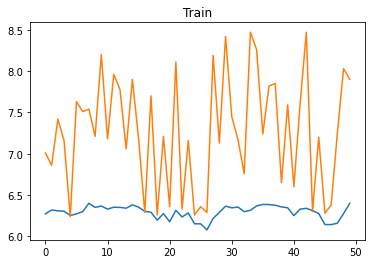

2/2 [==============================] - 5s 10ms/step


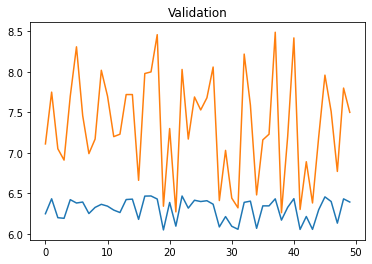

3/3 [==============================] - 0s 6ms/step


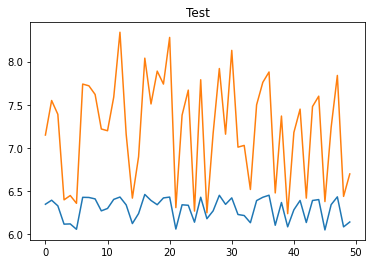

3/3 [==============================] - 0s 7ms/step


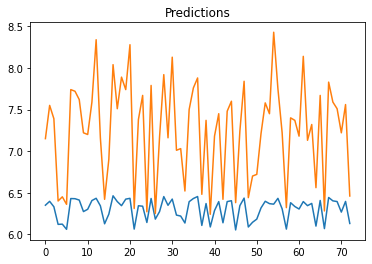

In [35]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [36]:
mavg_auto_lstm_mse

1.1118829464938347

# Hybrid

## General

### CNN LSTM

In [37]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 51.0763 - root_mean_squared_error: 7.1468

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 147s 15s/step - loss: 51.0763 - root_mean_squared_error: 7.1468 - val_loss: 47.7307 - val_root_mean_squared_error: 6.9087
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 47.6280 - root_mean_squared_error: 6.9013

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 47.5440 - root_mean_squared_error: 6.8952 - val_loss: 45.0795 - val_root_mean_squared_error: 6.7141
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 44.5489 - root_mean_squared_error: 6.6745

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 87s 12s/step - loss: 44.5489 - root_mean_squared_error: 6.6745 - val_loss: 42.2284 - val_root_mean_squared_error: 6.4983
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 42.2991 - root_mean_squared_error: 6.5038

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 42.2991 - root_mean_squared_error: 6.5038 - val_loss: 40.4754 - val_root_mean_squared_error: 6.3620
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 40.4211 - root_mean_squared_error: 6.3578

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 40.4211 - root_mean_squared_error: 6.3578 - val_loss: 38.2880 - val_root_mean_squared_error: 6.1877
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 38.3210 - root_mean_squared_error: 6.1904

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 38.3210 - root_mean_squared_error: 6.1904 - val_loss: 36.5336 - val_root_mean_squared_error: 6.0443
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 36.5842 - root_mean_squared_error: 6.0485

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 14s/step - loss: 36.5842 - root_mean_squared_error: 6.0485 - val_loss: 34.8607 - val_root_mean_squared_error: 5.9043
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 34.9017 - root_mean_squared_error: 5.9078

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 34.9017 - root_mean_squared_error: 5.9078 - val_loss: 33.1874 - val_root_mean_squared_error: 5.7609
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 33.0909 - root_mean_squared_error: 5.7525

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 33.0909 - root_mean_squared_error: 5.7525 - val_loss: 31.4133 - val_root_mean_squared_error: 5.6048
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 31.4711 - root_mean_squared_error: 5.6099

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 31.4711 - root_mean_squared_error: 5.6099 - val_loss: 29.4823 - val_root_mean_squared_error: 5.4298
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 29.0120 - root_mean_squared_error: 5.3863

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 29.0120 - root_mean_squared_error: 5.3863 - val_loss: 27.3139 - val_root_mean_squared_error: 5.2263
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 27.3438 - root_mean_squared_error: 5.2291

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 16s/step - loss: 27.3438 - root_mean_squared_error: 5.2291 - val_loss: 25.8527 - val_root_mean_squared_error: 5.0846
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 25.8824 - root_mean_squared_error: 5.0875

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 25.8824 - root_mean_squared_error: 5.0875 - val_loss: 24.4359 - val_root_mean_squared_error: 4.9433
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 24.4842 - root_mean_squared_error: 4.9482

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 116s 17s/step - loss: 24.4842 - root_mean_squared_error: 4.9482 - val_loss: 23.1170 - val_root_mean_squared_error: 4.8080
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 23.1688 - root_mean_squared_error: 4.8134

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 23.1688 - root_mean_squared_error: 4.8134 - val_loss: 21.7977 - val_root_mean_squared_error: 4.6688
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 21.8259 - root_mean_squared_error: 4.6718

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 115s 16s/step - loss: 21.8259 - root_mean_squared_error: 4.6718 - val_loss: 20.4944 - val_root_mean_squared_error: 4.5271
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 20.6206 - root_mean_squared_error: 4.5410

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 20.6206 - root_mean_squared_error: 4.5410 - val_loss: 19.1965 - val_root_mean_squared_error: 4.3814
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 19.2239 - root_mean_squared_error: 4.3845

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 137s 19s/step - loss: 19.2379 - root_mean_squared_error: 4.3861 - val_loss: 18.0234 - val_root_mean_squared_error: 4.2454
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 18.1365 - root_mean_squared_error: 4.2587

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 18.1365 - root_mean_squared_error: 4.2587 - val_loss: 17.1440 - val_root_mean_squared_error: 4.1405
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 17.1099 - root_mean_squared_error: 4.1364

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 17.1326 - root_mean_squared_error: 4.1392 - val_loss: 15.9916 - val_root_mean_squared_error: 3.9989
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 16.0810 - root_mean_squared_error: 4.0101

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 120s 17s/step - loss: 16.0810 - root_mean_squared_error: 4.0101 - val_loss: 15.0167 - val_root_mean_squared_error: 3.8751
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 15.1241 - root_mean_squared_error: 3.8890

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 15.1241 - root_mean_squared_error: 3.8890 - val_loss: 14.1300 - val_root_mean_squared_error: 3.7590
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 14.2254 - root_mean_squared_error: 3.7717

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 145s 21s/step - loss: 14.1799 - root_mean_squared_error: 3.7656 - val_loss: 13.2066 - val_root_mean_squared_error: 3.6341
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 13.3166 - root_mean_squared_error: 3.6492

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 108s 15s/step - loss: 13.3166 - root_mean_squared_error: 3.6492 - val_loss: 12.4215 - val_root_mean_squared_error: 3.5244
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 12.6362 - root_mean_squared_error: 3.5547

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 115s 16s/step - loss: 12.5359 - root_mean_squared_error: 3.5406 - val_loss: 11.6734 - val_root_mean_squared_error: 3.4166
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 11.8238 - root_mean_squared_error: 3.4386

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 11.7900 - root_mean_squared_error: 3.4337 - val_loss: 10.9717 - val_root_mean_squared_error: 3.3124
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 11.1508 - root_mean_squared_error: 3.3393

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 117s 17s/step - loss: 11.0891 - root_mean_squared_error: 3.3300 - val_loss: 10.3099 - val_root_mean_squared_error: 3.2109
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 10.4299 - root_mean_squared_error: 3.2295

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 15s/step - loss: 10.4299 - root_mean_squared_error: 3.2295 - val_loss: 9.6883 - val_root_mean_squared_error: 3.1126
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 9.8132 - root_mean_squared_error: 3.1326

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 120s 17s/step - loss: 9.8132 - root_mean_squared_error: 3.1326 - val_loss: 9.1054 - val_root_mean_squared_error: 3.0175
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 9.2366 - root_mean_squared_error: 3.0392

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 9.2366 - root_mean_squared_error: 3.0392 - val_loss: 8.5662 - val_root_mean_squared_error: 2.9268
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 8.7009 - root_mean_squared_error: 2.9497

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 106s 15s/step - loss: 8.7009 - root_mean_squared_error: 2.9497 - val_loss: 8.0687 - val_root_mean_squared_error: 2.8405
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 8.2022 - root_mean_squared_error: 2.8639

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 161s 22s/step - loss: 8.2072 - root_mean_squared_error: 2.8648 - val_loss: 7.6086 - val_root_mean_squared_error: 2.7584
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 7.7501 - root_mean_squared_error: 2.7839

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 15s/step - loss: 7.7501 - root_mean_squared_error: 2.7839 - val_loss: 7.1803 - val_root_mean_squared_error: 2.6796
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 7.3246 - root_mean_squared_error: 2.7064

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 136s 19s/step - loss: 7.3246 - root_mean_squared_error: 2.7064 - val_loss: 6.7835 - val_root_mean_squared_error: 2.6045
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 6.9523 - root_mean_squared_error: 2.6367

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 6.9309 - root_mean_squared_error: 2.6327 - val_loss: 6.4099 - val_root_mean_squared_error: 2.5318
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 6.5563 - root_mean_squared_error: 2.5605

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 140s 20s/step - loss: 6.5563 - root_mean_squared_error: 2.5605 - val_loss: 6.0603 - val_root_mean_squared_error: 2.4618
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 6.2041 - root_mean_squared_error: 2.4908

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 112s 16s/step - loss: 6.2041 - root_mean_squared_error: 2.4908 - val_loss: 5.7290 - val_root_mean_squared_error: 2.3935
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 5.8733 - root_mean_squared_error: 2.4235

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 14s/step - loss: 5.8733 - root_mean_squared_error: 2.4235 - val_loss: 5.4147 - val_root_mean_squared_error: 2.3269
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 5.5569 - root_mean_squared_error: 2.3573

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 123s 17s/step - loss: 5.5569 - root_mean_squared_error: 2.3573 - val_loss: 5.1172 - val_root_mean_squared_error: 2.2621
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 5.2578 - root_mean_squared_error: 2.2930

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 15s/step - loss: 5.2578 - root_mean_squared_error: 2.2930 - val_loss: 4.8345 - val_root_mean_squared_error: 2.1988
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 4.9737 - root_mean_squared_error: 2.2302

KeyboardInterrupt: 

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")

In [ ]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)